In [1]:
library(BGVAR) #load library
library(ggplot2)
#library(zoo)
#library(janitor) #rowtonames function
library(data.table)
#library(xts)
library(readxl)

## Load Data

In [2]:
flights = read_excel('../../data/raw/airsavvi_flight_data_20201215.xlsx')

In [9]:
# Read in the data files
df_covid = read.csv('../../data/tidy/cases_deaths_concat.csv')
df_google = read.csv('../../data/tidy/google_activity.csv')
df_interv = read.csv('../../data/tidy/govt_interventions.csv')
df_deter = read.csv('../../data/tidy/deterministic.csv')


# Here, we make all the names uniform
# Ideally, this should be done in the preprocessing script in python (make this a TODO)
names(df_covid)[3:(ncol(df_covid))] = gsub(x = names(df_covid)[3:201], pattern = "X", replacement = "")
names(df_google)[3:(ncol(df_google))] = names(df_covid)[3:(ncol(df_covid))]
names(df_interv)[3:(ncol(df_google))] = names(df_covid)[3:(ncol(df_covid))]
df_covid = cbind(df_covid[['iso']], df_covid[['X']], df_covid[,3:(ncol(df_covid))]) #reorder ISO and Variable columns TODO

#Standardize names of first 2 columns (This can/should also be done in python pre-processing script) (TODO)
names(df_covid)[1:2] = c('iso','variable')
names(df_google)[1:2] = c('iso','variable') 
names(df_interv)[1:2] = c('iso','variable')

# Change the variable names to be shorter (TODO)
# Save these new names in the Python pre-processing script. Once this is done, the next few lines should be obsolete
df_interv$variable <- gsub(x = df_interv$variable, pattern = "Public health measures", replacement = "phm")
df_interv$variable <- gsub(x = df_interv$variable, pattern = "Governance and socio-economic measures", replacement = "sem")
df_interv$variable <- gsub(x = df_interv$variable, pattern = "Social distancing", replacement = "sd")
df_interv$variable <- gsub(x = df_interv$variable, pattern = "Movement restrictions", replacement = "mr")
df_interv$variable <- gsub(x = df_interv$variable, pattern = "Lockdown", replacement = "ld")
df_interv$variable <- gsub(x = df_interv$variable, pattern = "Humanitarian exemption", replacement = "he")

#sort all df's by iso: (TODO)
sort_df_by_iso <- function(df) {
    df <- df[order(df[['iso']]), ]
    rownames(df)<-1:nrow(df)
    return(df)
}

df_covid = sort_df_by_iso(df_covid)
df_google = sort_df_by_iso(df_google)
df_interv = sort_df_by_iso(df_interv)
df_deter = sort_df_by_iso(df_deter)

In [10]:
iso3iso2 = read.csv('../../data/raw/iso3_iso2_country_codes.csv')

In [91]:
head(df_covid)
head(df_google)
head(df_interv)
head(df_deter)

iso variable 2.15.2020 2.16.2020 2.17.2020 2.18.2020 2.19.2020 2.20.2020
1 AE  cases     8         9        -1        0         0         0        
2 AE  deaths    0         0         0        0         0         0        
3 AR  cases     0         0         0        0         0         0        
4 AR  deaths    0         0         0        0         0         0        
5 AU  cases    15        15         0        0         0         0        
6 AU  deaths    0         0         0        0         0         0        
  2.21.2020 2.22.2020 ⋯ 8.22.2020 8.23.2020 8.24.2020 8.25.2020 8.26.2020
1 0         4         ⋯   33        -34     -115        64        60     
2 0         0         ⋯    1          1       -2         0         0     
3 0         0         ⋯ -400      -2407     3361        58      1779     
4 0         0         ⋯  -95         19      244      -184        79     
5 0         0         ⋯   14       -105       34        13       -33     
6 0         0         ⋯    4         -2       -7        16        -1     
  8.27.2020 8.28.2020 8.29.2020 8.30.2020 8.31.2020
1   92      -101         37       -65      179     
2   -1         1         -1         3       -1     
3 -446      1613      -2487     -2043     2122     
4  -65        10       -139        22       99     
5    8       -27         24       -47       -3     
6  -12         6         -6        30      -36

iso variable    2.15.2020 2.16.2020 2.17.2020 2.18.2020 2.19.2020 2.20.2020
1 AE  grocery     4          0        -3         0        -1         1       
2 AE  parks       5         -1         1         0        -1         2       
3 AE  residential 1          0         0         0         0         0       
4 AE  retail      0          1        -2        -1         0         0       
5 AE  transit     0          1         0        -1        -1         2       
6 AE  workplaces  2          0         0         0         0        -1       
  2.21.2020 2.22.2020 ⋯ 8.22.2020 8.23.2020 8.24.2020 8.25.2020 8.26.2020
1  1         0        ⋯  7         10       -11        2        1        
2  0        -2        ⋯ 13          6        -5        1        0        
3  0         0        ⋯ -2         14       -12        0        0        
4 -1         1        ⋯ 10          4        -6        1        1        
5 -1        -2        ⋯  6         -9        11        1        0        
6 -2         4        ⋯ -1        -43        38       -1        1        
  8.27.2020 8.28.2020 8.29.2020 8.30.2020 8.31.2020
1  2         -6        6          7       -5       
2 -1        -13        9          8       -2       
3  1         -1       -2          1        1       
4  1         -8        7          5       -3       
5  0         -6        5          2       -1       
6  0          7        2        -10       -1

iso variable 2.15.2020 2.16.2020 2.17.2020 2.18.2020 2.19.2020 2.20.2020
1 AE  mr       0         0         0         0         0         0        
2 AE  phm      0         0         0         0         0         0        
3 AE  sd       0         0         0         0         0         0        
4 AE  sem      0         0         0         0         0         0        
5 AE  ld       0         0         0         0         0         0        
6 AE  he       0         0         0         0         0         0        
  2.21.2020 2.22.2020 ⋯ 8.22.2020 8.23.2020 8.24.2020 8.25.2020 8.26.2020
1 0         0         ⋯ 0         0         0         0         0        
2 0         0         ⋯ 0         0         0         0         0        
3 0         0         ⋯ 0         0         0         0         0        
4 0         0         ⋯ 0         0         0         0         0        
5 0         0         ⋯ 0         0         0         0         0        
6 0         0         ⋯ 0         0         0         0         0        
  8.27.2020 8.28.2020 8.29.2020 8.30.2020 8.31.2020
1 0         0         0         0         1        
2 0         0         0         0         1        
3 0         0         0         0         0        
4 0         0         0         0         0        
5 0         0         0         0         0        
6 0         0         0         0         0

iso year pop_WDI_PW gdp_WDI_PW   gdppc_WDI_PW growth_WDI_PW pop_WDI 
1 AE  2015  9156963   3.599900e+11 39313.274    3.7576429      9156963
2 AR  2015 43416755   4.559480e+11 10501.660    2.6472714     43416755
3 AU  2015 23789752   1.301020e+12 54688.446    2.2400286     23789752
4 AT  2015  8638366   4.112190e+11 47603.797    0.9630584      8638366
5 BE  2015 11249420   5.082650e+11 45181.438    1.5002308     11249420
6 BG  2015  7177991   5.463905e+10  7612.025    3.6174426      7177991
  pop_den_WDI pop_urb_WDI pop0_14_WDI workingpop_WDI
1 109.533050  85.54       13.93747    84.92465      
2  15.864696  91.75       25.19420    63.87925      
3   3.096697  89.42       18.69809    66.25704      
4 104.678283  65.96       14.20764    67.03323      
5 371.513210  97.85       16.94444    64.83074      
6  66.120035  73.94       14.14402    65.82851

In [79]:
tail(iso3iso2)

iso_3 iso_2 Definition          
246 VIR   VI    Virgin Islands, U.S.
247 WLF   WF    Wallis and Futuna   
248 ESH   EH    Western Sahara      
249 YEM   YE    Yemen               
250 ZMB   ZM    Zambia              
251 ZWE   ZW    Zimbabwe

## Change all ISO codes from 3-letter to 2-letter (for BGVAR compatibility)

In [11]:
change_iso3_to_iso2 <- function(iso_code) {
    if (nchar(iso_code) == 3) {
        iso_code = subset(iso3iso2, iso_3==iso_code)$iso_2
    }
    return(iso_code)
}

In [12]:
df_covid$iso = apply(df_covid[1], 1, change_iso3_to_iso2)
df_google$iso = apply(df_google[1], 1, change_iso3_to_iso2)
df_interv$iso = apply(df_interv[1], 1, change_iso3_to_iso2)
df_deter$iso = apply(df_deter[1], 1, change_iso3_to_iso2)

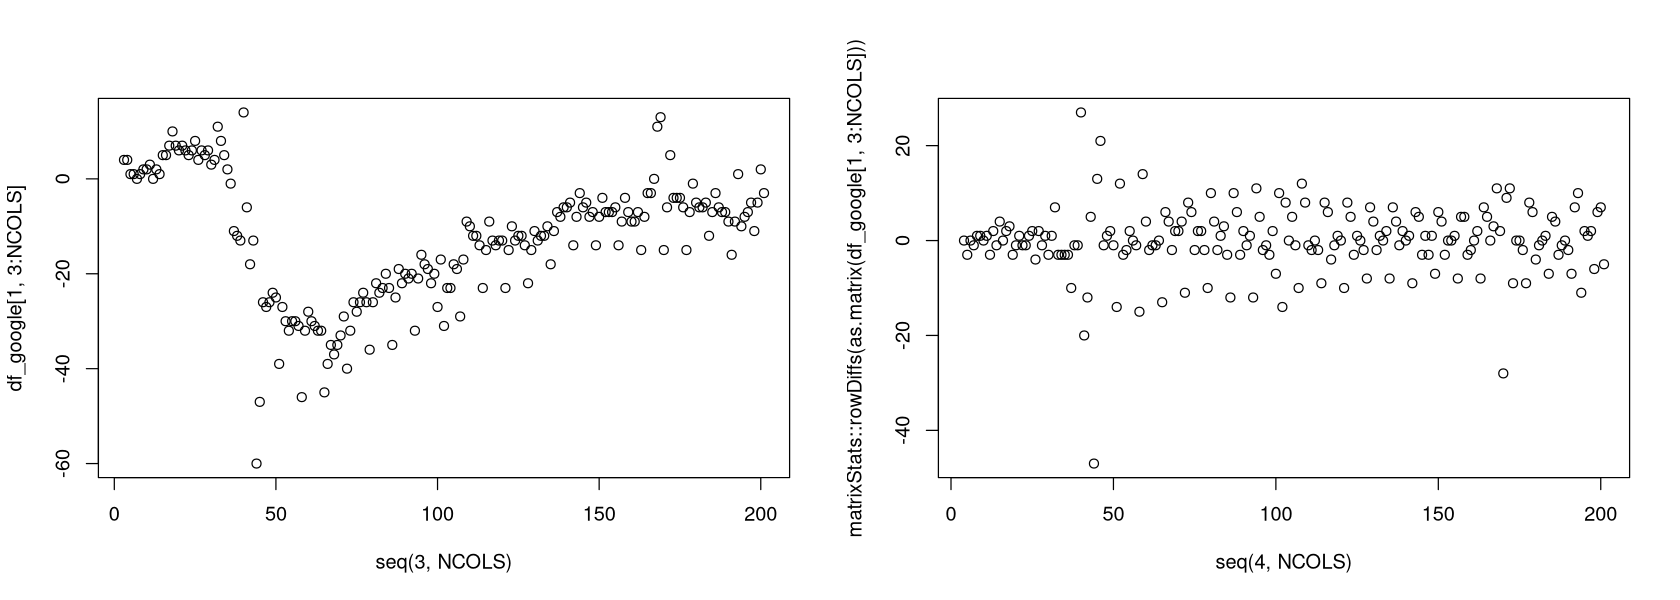

In [13]:
# Exploratory plots for differencing
NCOLS = ncol(df_google)
options(repr.plot.width = 14, repr.plot.height = 5) 
par(mfrow=c(1,2))
plot(seq(3,NCOLS),df_google[1,3:NCOLS]) #quick exploratory plotting
plot(seq(4,NCOLS),matrixStats::rowDiffs(as.matrix(df_google[1,3:NCOLS]))) #quick exploratory plotting

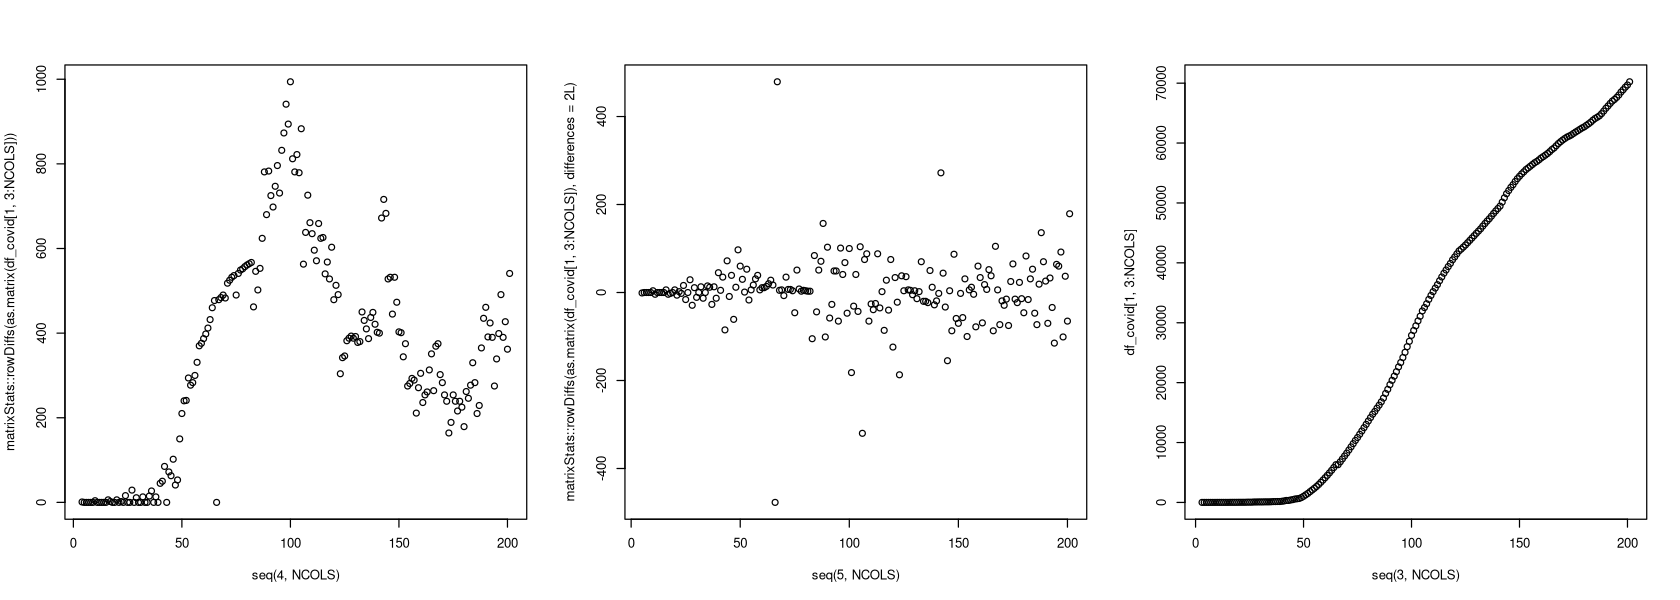

In [14]:
par(mfrow=c(1,3))
plot(seq(4,NCOLS),matrixStats::rowDiffs(as.matrix(df_covid[1,3:NCOLS]))) #quick exploratory plotting
plot(seq(5,NCOLS),matrixStats::rowDiffs(as.matrix(df_covid[1,3:NCOLS]), differences=2L)) # twice differenced
plot(seq(3,NCOLS),df_covid[1,3:NCOLS]) #quick exploratory plotting

In [15]:
# Appropriately difference COVID cases and Google activity data
df_covid[, 5:201] = matrixStats::rowDiffs(as.matrix(df_covid[, 3:201]), differences=2L) # convert to daily cases and then difference
df_google[, 4:201] = matrixStats::rowDiffs(as.matrix(df_google[, 3:201])) # 1st difference of google activity/mobility
# More data transformations can/may need to be done here. 

In [16]:
# Check for consistency/completeness across country names
all(unique(df_google$iso) == unique(df_covid$iso))
all(unique(df_google$iso) == unique(df_interv$iso))
all(unique(df_google$iso) == unique(df_deter$iso))
print(paste0("Number of unique countries: ", length(unique(df_google$iso))))
unique(df_interv$country)[!unique(df_interv$country) %in% unique(df_covid$country)]
unique(df_interv$country)[!unique(df_interv$country) %in% unique(df_google$country)]
unique(df_covid$country)[!unique(df_covid$country) %in% unique(df_google$country)]
unique(df_interv$country)[!unique(df_interv$country) %in% unique(df_deter$iso)]

[1] TRUE

[1] TRUE

[1] TRUE

[1] "Number of unique countries: 57"


NULL

NULL

NULL

NULL

### Convert endogenous data into list of matrices

In [322]:
as.numeric(format(formatted_dates[1], "%j"))

[1] 46

In [17]:
#Convert endogenous data into list of dataframes; each list element corresponds to country
# For each country, rows = time obs; columns = endogenous variables
df_endo <- rbind(df_covid[,1:NCOLS], df_google[,1:NCOLS]) #endogenous variables
formatted_dates = as.Date(colnames(df_endo)[-c(1,2)], format = c("%m.%d.%Y"))
#df_endo[rowSums(is.na(df_endo)) > 0,]
#apply(df_endo, 1, function(x) any(is.na(x)))
countries_with_missing_data = unique(df_endo[rowSums(is.na(df_endo)) > 0,]$iso)
df_endo = subset(df_endo, !(iso %in% countries_with_missing_data))

In [18]:
endoList = list()
for (i in unique(df_endo$iso)) {
    #country_df = janitor::row_to_names(t(df_endo[df_endo$iso==i, 2:NCOLS]), 1)
    country_df = transpose(df_endo[df_endo$iso==i, 2:NCOLS])
    colnames(country_df) = country_df[1,]
    country_df = country_df[-1, c('cases', 'residential', 'workplaces', 'transit', 'grocery')]
    country_df = as.data.frame(sapply(country_df, as.numeric))
    country_df = ts(country_df, start = c(2020, as.numeric(format(formatted_dates[1], "%j"))), frequency = 365)
    #rownames(country_df) = formatted_dates
    #country_df = as.xts(country_df)
    #rownames(country_df) <- c()
    endoList[[i]] <- country_df 
}

In [319]:
endoList[1]
#colnames(endoList[[1]])

$AE
Time Series:
Start = c(2020, 46) 
End = c(2020, 244) 
Frequency = 365 
         cases residential workplaces transit grocery
2020.123     8           1          2       0       4
2020.126     9           1          2       1       4
2020.129     9           1          2       1       1
2020.132     9           1          2       0       1
2020.134     9           1          2      -1       0
2020.137     9           1          1       1       1
2020.140     9           1         -1       0       2
2020.142    13           1          3      -2       2
2020.145    13           1          4      -1       3
2020.148    13           1          3      -1       0
2020.151    13           1          3      -2       2
2020.153    13           1          3      -2       1
2020.156    13           1          3      -1       5
2020.159    19           1          1      -1       5
2020.162    21           0          5      -1       7
2020.164    21           1          4      -1      10
2020.167    21           1          4      -2       7
2020.170    27           1          4      -5       6
2020.173    27           2          3      -5       7
2020.175    29           2          3      -5       6
2020.178    29           3          0      -9       5
2020.181    45           2          4      -8       6
2020.184    45           3         -1      -9       8
2020.186    45           4         -1     -10       4
2020.189    74           4         -2     -11       6
2020.192    74           4         -2     -12       5
2020.195    85           5         -3     -15       6
2020.197    85           5         -2     -20       3
2020.200    85           4          2     -17       4
2020.203    98           5         -4     -15      11
2020.205    98           6         -6     -17       8
2020.208    98           7         -9     -22       5
2020.211   113           9        -11     -25       2
2020.214   140          11        -12     -31      -1
2020.216   140          11        -12     -44     -11
2020.219   153          10         -8     -42     -12
2020.222   153          13        -17     -45     -13
2020.225   198          14        -20     -46      14
2020.227   248          17        -28     -53      -6
2020.230   333          21        -35     -60     -18
2020.233   333          25        -40     -67     -13
2020.236   405          25        -52     -84     -60
2020.238   468          28        -56     -80     -47
2020.241   570          26        -45     -69     -26
2020.244   611          25        -46     -69     -27
2020.247   664          25        -46     -69     -26
2020.249   814          25        -46     -70     -24
2020.252  1024          28        -47     -71     -25
2020.255  1264          22        -44     -79     -39
2020.258  1505          21        -37     -72     -27
2020.260  1799          31        -57     -79     -30
2020.263  2076          30        -56     -78     -32
2020.266  2359          30        -55     -78     -30
2020.268  2659          30        -55     -78     -30
2020.271  2990          33        -55     -79     -31
2020.274  3360          23        -49     -84     -46
2020.277  3736          24        -45     -79     -32
2020.279  4123          30        -55     -79     -28
2020.282  4521          30        -55     -78     -30
2020.285  4933          30        -55     -78     -31
2020.288  5365          31        -56     -78     -32
2020.290  5825          34        -55     -79     -32
2020.293  6302          23        -48     -84     -45
2020.296  6302          24        -45     -78     -39
2020.299  6781          30        -54     -78     -35
2020.301  7265          30        -55     -78     -37
2020.304  7755          30        -55     -78     -35
2020.307  8238          30        -55     -77     -33
2020.310  8756          32        -55     -77     -29
2020.312  9281          24        -47     -80     -40
2020.315  9813          25        -41     -74     -32
2020.318 10349          30        -49

[1] "cases"       "residential" "workplaces"  "transit"     "grocery"

### Convert exogenous data into list of matrices

In [83]:
df_exo <- df_interv[,1:NCOLS] #strictly exogenous variables
df_exo = subset(df_exo, !(iso %in% countries_with_missing_data))
unique(df_exo$iso)

[1] "AE" "AR" "AU" "AT" "BE" "BG" "BR" "CA" "CL" "CO" "CZ" "DE" "DK" "EG" "ES"
[16] "FI" "FR" "GB" "GR" "HR" "HU" "ID" "IN" "IE" "IL" "IT" "JP" "KH" "KR" "LT"
[31] "MA" "MX" "MY" "NL" "NZ" "PH" "PT" "RU" "SA" "SG" "SK" "SE" "TH" "TR" "UA"
[46] "UY" "US" "VN" "ZA"

In [85]:
exoList = list()
for (i in unique(df_exo$iso)) {
    #country_df = janitor::row_to_names(t(df_exo[df_exo$iso==i, 2:NCOLS]), 1)
    country_df = transpose(df_exo[df_exo$iso==i, 2:NCOLS])
    colnames(country_df) = country_df[1,]
    country_df = country_df[-1,]
    country_df = as.data.frame(sapply(country_df, as.numeric))
    country_df = ts(country_df, start = c(2020, as.numeric(format(formatted_dates[1], "%j"))), frequency = 365)
    country_df = subset(country_df, select = c('ld'))
    exoList[[i]] <- country_df 
}

In [301]:
#Check for consistency across exo and endo countries
names(exoList)
names(endoList)
all(names(endoList) == names(exoList))
NCOLS

[1] "AE" "AR" "AU" "AT" "BE" "BG" "BR" "CA" "CL" "CO" "CZ" "DE" "DK" "EG" "ES"
[16] "FI" "FR" "GB" "GR" "HR" "HU" "ID" "IN" "IE" "IL" "IT" "JP" "KH" "KR" "LT"
[31] "MA" "MX" "MY" "NL" "NZ" "PH" "PT" "RU" "SA" "SG" "SK" "SE" "TH" "TR" "UA"
[46] "UY" "US" "VN" "ZA"

[1] "AE" "AR" "AU" "AT" "BE" "BG" "BR" "CA" "CL" "CO" "CZ" "DE" "DK" "EG" "ES"
[16] "FI" "FR" "GB" "GR" "HR" "HU" "ID" "IN" "IE" "IL" "IT" "JP" "KH" "KR" "LT"
[31] "MA" "MX" "MY" "NL" "NZ" "PH" "PT" "RU" "SA" "SG" "SK" "SE" "TH" "TR" "UA"
[46] "UY" "US" "VN" "ZA"

[1] TRUE

[1] 201

In [89]:
is.na(exoList['CA'])

CA 
FALSE

### Weight matrix (uniform, static)

In [46]:
# Create uniform weight matrix (static in the current implementation)
bW = data.frame(matrix(0, ncol = length(endoList), nrow = length(endoList)))
rownames(bW) = names(endoList)
colnames(bW) = names(endoList)
for ( i in seq(1, length(endoList))) {
  for (j in seq(1, length(endoList))) {
    if (i != j) {
      #print(c(i,j))
      bW[i,j] = 1.0/(length(endoList) - 1)
    }
  }
}

bW = as.matrix(bW)
# Check weight matrix structure
all(colnames(bW)==names(endoList))
rowSums(bW)
diag(as.matrix(bW))

# convert matrix into list as required
#bWList = as.matrix(bW)
bWList <- list()
weakly_exo_var_list = c("covid")
for (i in weakly_exo_var_list) {
  bWList[[i]] <- bW
}

# for (i in colnames(bW)) {
#   w_df <- data.frame(bW[,c(i)])
#   colnames(w_df) <- i
#   rownames(w_df) <- rownames(bW)
#   bWList[[i]] <- w_df
# }
#W.list = list()
#bWList = W.list[['covid']]

[1] TRUE

AE AR AU AT BE BG BR CA CL CO CZ DE DK EG ES FI FR GB GR HR HU ID IN IE IL IT 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
JP KH KR LT MA MX MY NL NZ PH PT RU SA SG SK SE TH TR UA UY US VN ZA 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

AE AR AU AT BE BG BR CA CL CO CZ DE DK EG ES FI FR GB GR HR HU ID IN IE IL IT 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
JP KH KR LT MA MX MY NL NZ PH PT RU SA SG SK SE TH TR UA UY US VN ZA 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

### Weight matrix - first week of flight data - nonuniform, static

In [67]:
flights_week1 = flights[65:128,2:66]
weight_matrix = as.matrix(flights_week1[,2:65])
rownames(weight_matrix) = flights_week1[,1][[1]]
weight_matrix = weight_matrix[unique(df_exo$iso), unique(df_exo$iso)]
weight_matrix[is.na(weight_matrix)] = 0

In [68]:
weight_matrix['AE',]

AE  AR  AU  AT  BE  BG  BR  CA  CL  CO  CZ  DE  DK  EG  ES  FI  FR  GB  GR  HR 
  0   0  95  21  21  12  14  15   0   0  18 109  10 144  41   8  61 210  23   4 
 HU  ID  IN  IE  IL  IT  JP  KH  KR  LT  MA  MX  MY  NL  NZ  PH  PT  RU  SA  SG 
 14  42 994  21   0  73  29   0  21   0  16   0  35  37   7  53  18 122 563  42 
 SK  SE  TH  TR  UA  UY  US  VN  ZA 
  3  18  84 100  24   0 110  21  53

In [69]:
for ( i in rownames(weight_matrix)) {
    weight_matrix[i, ] = weight_matrix[i, ]/rowSums(weight_matrix)[i]
}

In [70]:
rowSums(weight_matrix)

AE AR AU AT BE BG BR CA CL CO CZ DE DK EG ES FI FR GB GR HR HU ID IN IE IL IT 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
JP KH KR LT MA MX MY NL NZ PH PT RU SA SG SK SE TH TR UA UY US VN ZA 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [86]:
#all(names(endoList) == names(bWList))
exoList[1]

$AE
       ld
  [1,]  0
  [2,]  0
  [3,]  0
  [4,]  0
  [5,]  0
  [6,]  0
  [7,]  0
  [8,]  0
  [9,]  0
 [10,]  0
 [11,]  0
 [12,]  0
 [13,]  0
 [14,]  0
 [15,]  0
 [16,]  0
 [17,]  0
 [18,]  0
 [19,]  0
 [20,]  0
 [21,]  0
 [22,]  0
 [23,]  0
 [24,]  0
 [25,]  0
 [26,]  0
 [27,]  0
 [28,]  0
 [29,]  0
 [30,]  0
 [31,]  0
 [32,]  0
 [33,]  0
 [34,]  0
 [35,]  0
 [36,]  0
 [37,]  0
 [38,]  0
 [39,]  0
 [40,]  0
 [41,]  0
 [42,]  0
 [43,]  0
 [44,]  0
 [45,]  0
 [46,]  0
 [47,]  0
 [48,]  0
 [49,]  0
 [50,]  0
 [51,]  0
 [52,]  0
 [53,]  0
 [54,]  0
 [55,]  0
 [56,]  0
 [57,]  0
 [58,]  0
 [59,]  0
 [60,]  1
 [61,]  0
 [62,]  0
 [63,]  0
 [64,]  0
 [65,]  0
 [66,]  0
 [67,]  0
 [68,]  0
 [69,]  0
 [70,]  1
 [71,]  0
 [72,]  0
 [73,]  0
 [74,]  0
 [75,]  0
 [76,]  0
 [77,]  0
 [78,]  0
 [79,]  0
 [80,]  0
 [81,]  0
 [82,]  0
 [83,]  0
 [84,]  0
 [85,]  0
 [86,]  0
 [87,]  0
 [88,]  0
 [89,]  0
 [90,]  0
 [91,]  0
 [92,]  0
 [93,]  0
 [94,]  0
 [95,]  0
 [96,]  0
 [97,]  0
 [98,]  0
 [99,]  0
[100,]  0
[101,]  0
[102,]  0
[103,]  0
[104,]  0
[105,]  0
[106,]  0
[107,]  0
[108,]  0
[109,]  0
[110,]  0
[111,]  0
[112,]  0
[113,]  0
[114,]  0
[115,]  0
[116,]  0
[117,]  0
[118,]  0
[119,]  0
[120,]  0
[121,]  0
[122,]  0
[123,]  0
[124,]  0
[125,]  0
[126,]  0
[127,]  0
[128,]  0
[129,]  0
[130,]  0
[131,]  0
[132,]  0
[133,]  0
[134,]  0
[135,]  0
[136,]  0
[137,]  0
[138,]  0
[139,]  0
[140,]  0
[141,]  0
[142,]  0
[143,]  0
[144,]  0
[145,]  0
[146,]  0
[147,]  0
[148,]  0
[149,]  0
[150,]  0
[151,]  0
[152,]  0
[153,]  0
[154,]  0
[155,]  0
[156,]  0
[157,]  0
[158,]  0
[159,]  0
[160,]  0
[161,]  0
[162,]  0
[163,]  0
[164,]  0
[165,]  0
[166,]  0
[167,]  0
[168,]  0
[169,]  0
[170,]  0
[171,]  0
[172,]  0
[173,]  0
[174,]  0
[175,]  0
[176,]  0
[177,]  0
[178,]  0
[179,]  0
[180,]  0
[181,]  0
[182,]  0
[183,]  0
[184,]  0
[185,]  0
[186,]  0
[187,]  0
[188,]  0
[189,]  0
[190,]  0
[191,]  0
[192,]  0
[193,]  0
[194,]  0
[195,]  0
[196,]  0
[197,]  0
[198,]  0
[199,]  0

In [87]:
## BGVAR
# SSVS prior
variable.list<-list()
variable.list$covid <-c("cases") #variable.list$fin<-c("stir","ltir","rer")

# Hyperparm.ssvs <- list(tau0   = 0.1,  # coefficients: prior variance for the spike # (tau0 << tau1)
#                        tau1   = 3,    # coefficients: prior variance for the slab  # (tau0 << tau1)
#                        kappa0 = 0.1,  # covariances: prior variance for the spike # (kappa0 << kappa1)
#                        kappa1 = 7,    # covariances: prior variance for the slab # (kappa0 << kappa1)
#                        a_i    = 0.01, # prior for the shape parameter of the IG
#                        b_i    = 0.01, # prior for the scale parameter of the IG
#                        p_i    = 0.5,  # prior inclusion probability of coefficients
#                        q_ij   = 0.5   # prior inclusion probability of covariances
#                       )

model <- bgvar(Data = endoList, #endogenous variables
               Ex = exoList, # exogenous variables
               W = weight_matrix, #WList["covid"], #static weight matrix (use uniform weights) #bWList[c("covid")]
               plag = 7,
               draws=100, burnin=100, prior="SSVS", SV=FALSE, #hyperpara=Hyperparm.ssvs, 
               #hold.out = 150, #40% held out 
               #thin = 1, 
               #trend = FALSE,
)

Start estimation of Bayesian Global Vector Autoregression.

Prior: Stochastic Search Variable Selection prior.
Lag order: 7
Stochastic volatility: disabled.
Number of cores used: 1.
Thinning factor: 1. This means every draw is saved.
Hyperparameter setup: 
	 No hyperparameters are chosen, default setting applied.

Estimation of country models starts... Error in BVAR_linear(Yraw, Wraw, Exraw, as.integer(plag), as.integer(draws),  : 
  inv(): matrix is singular
Error occured in countrymodel: CA. Please check.
Error in detail: 

[1] "Error in cbind(X, Exraw) : object 'X' not found\n"
attr(,"class")
[1] "try-error"
attr(,"condition")
<simpleError in cbind(X, Exraw): object 'X' not found>


ERROR: Error in .BVAR_linear_wrapper(cc = cc, cN = cN, xglobal = xglobal, gW = gW, : 


In [72]:
summary(model)

-------------------------------------------------------------------------------
Model Info:
Prior: 
Number of lags: 7
Number of posterior draws: 100/1=100
Number of countries: 49
-------------------------------------------------------------------------------
Convergence diagnostics
Geweke statistic:
21656 out of 420420 variables' z-values exceed the 1.96 threshold (5.15%).
-------------------------------------------------------------------------------
Global Likelihood: -Inf
-------------------------------------------------------------------------------
F-test, first order serial autocorrelation of cross-country residuals
Summary statistics:
=========  ==========  ======
\          # p-values  in %  
=========  ==========  ======
>0.1       56          22.86%
0.05-0.1   9           3.67% 
0.01-0.05  28          11.43%
<0.01      152         62.04%
=========  ==========  ======
-------------------------------------------------------------------------------
Average pairwise cross-country

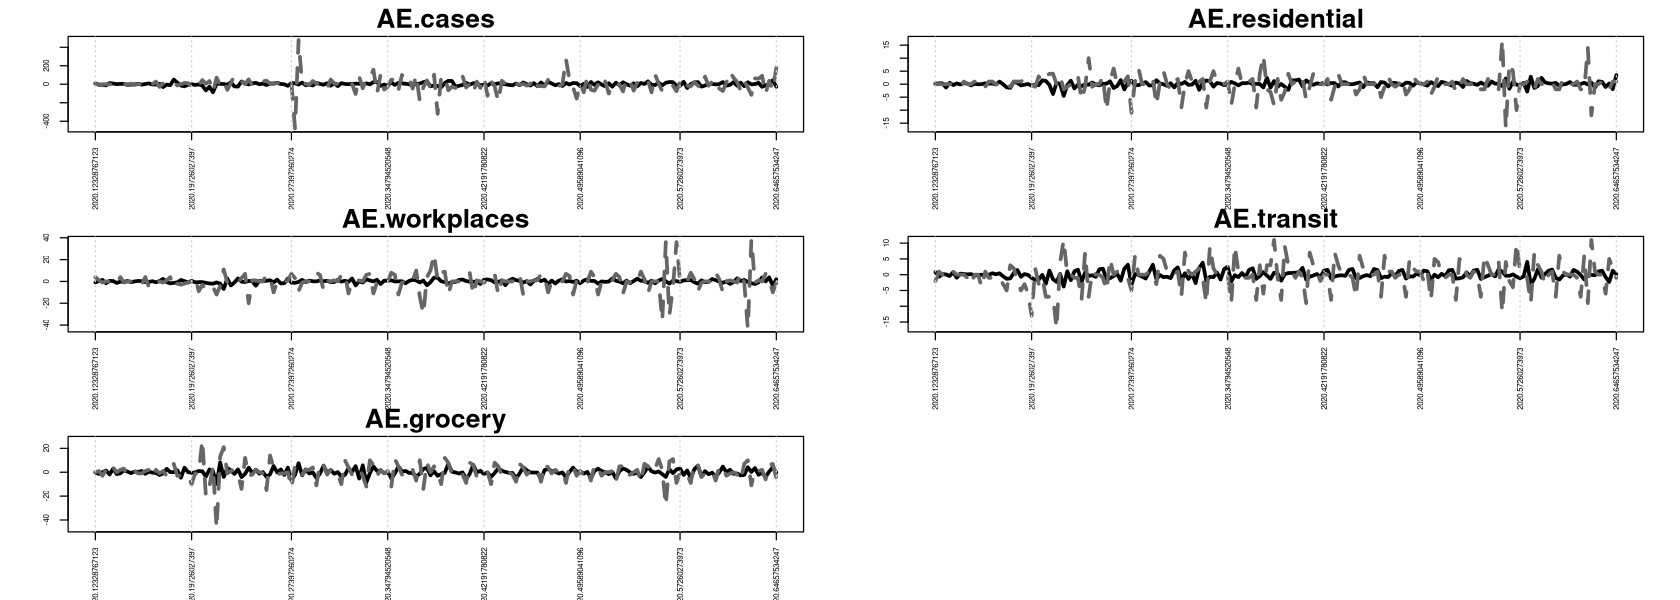

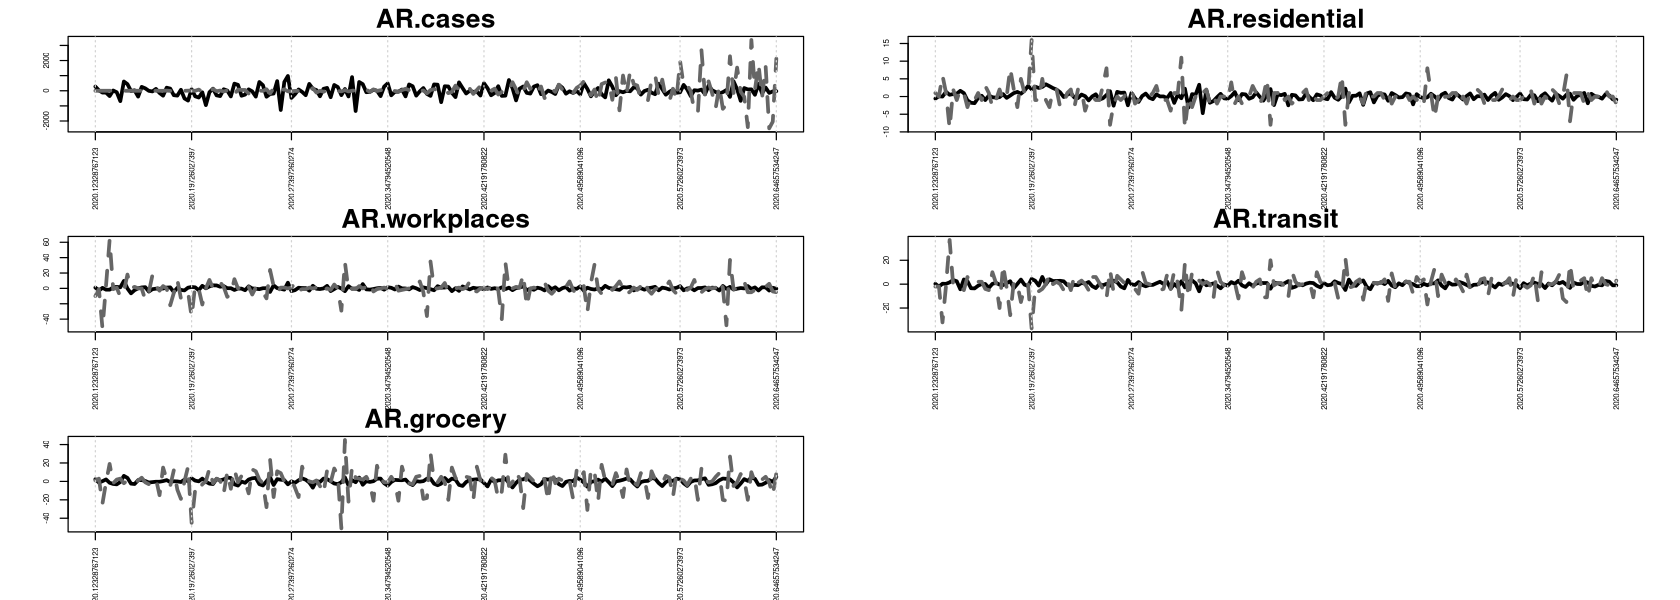

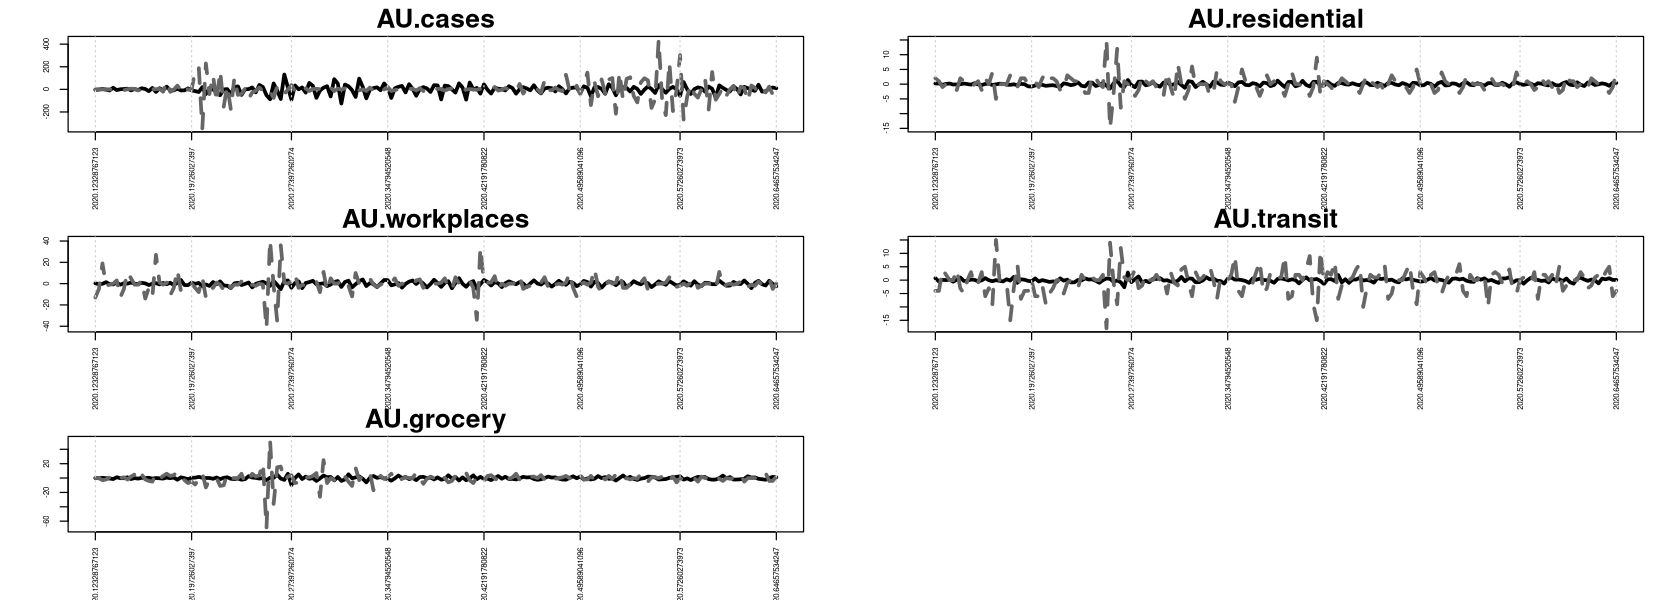

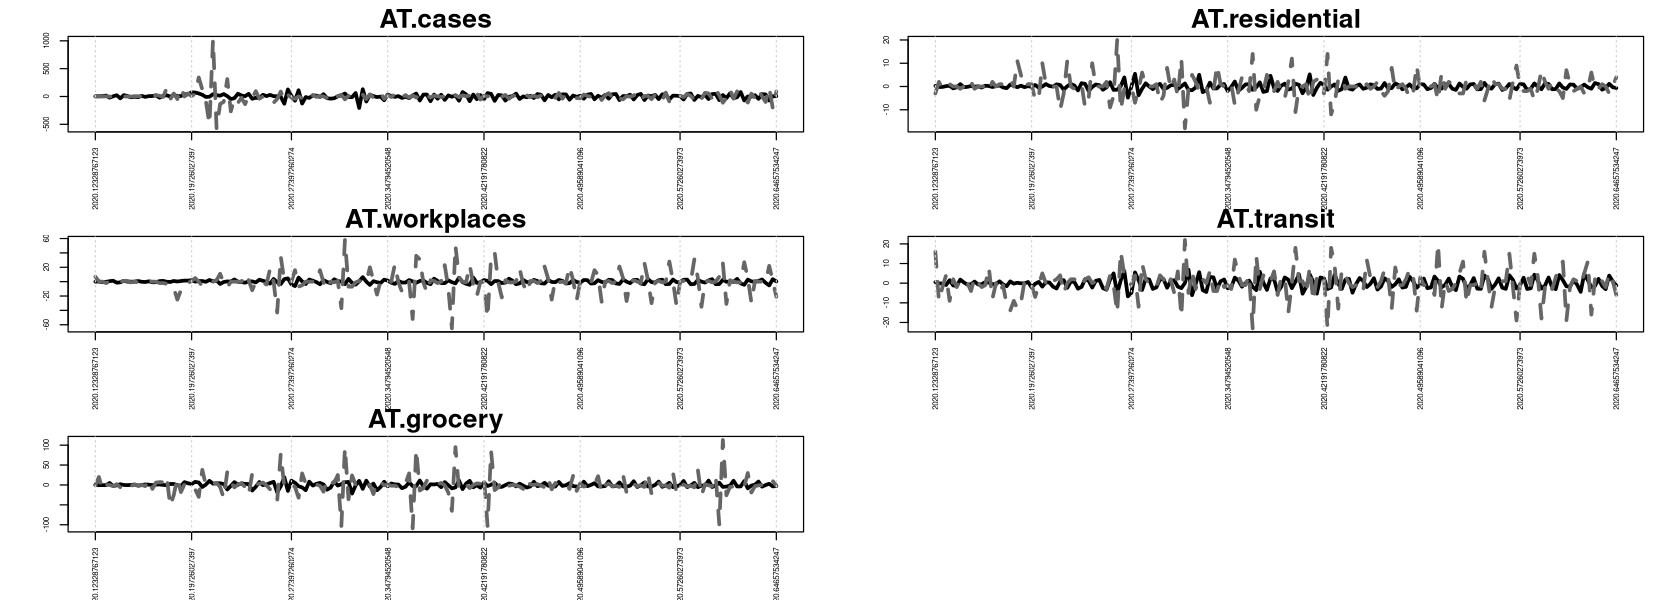

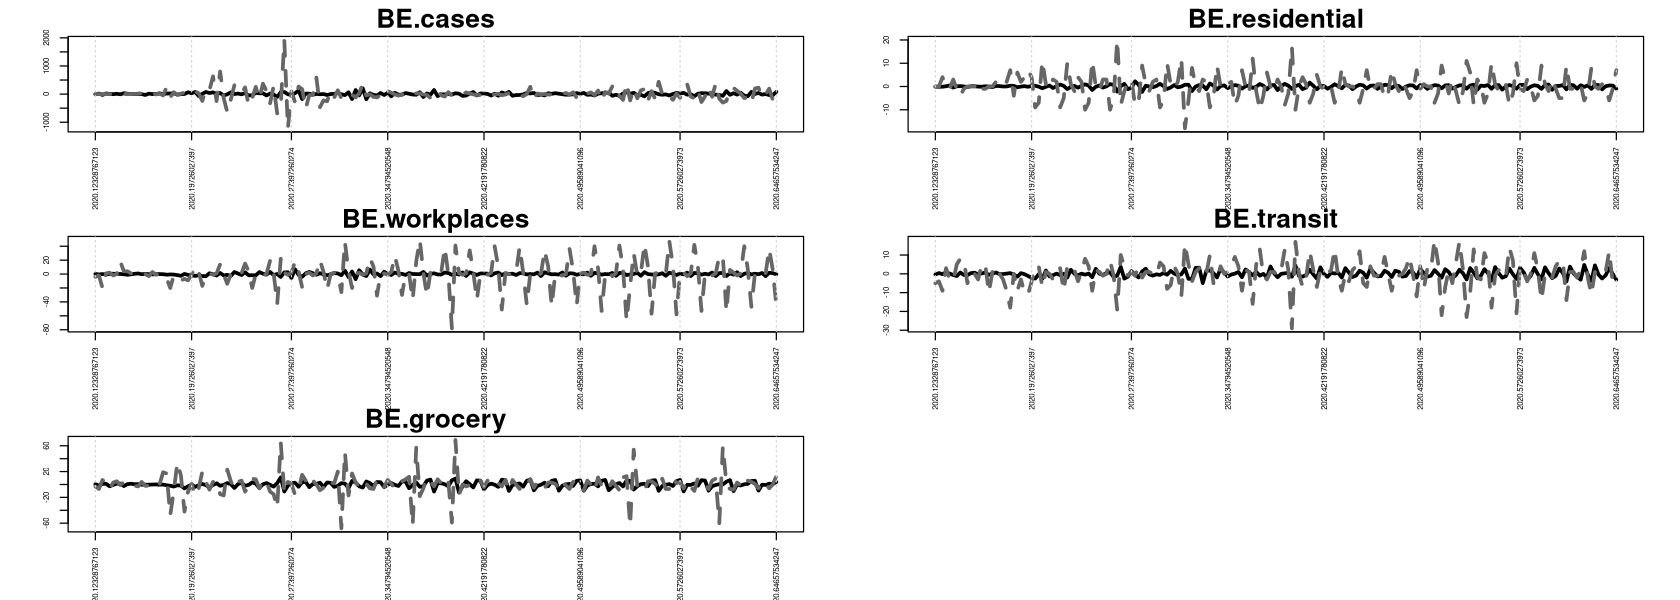

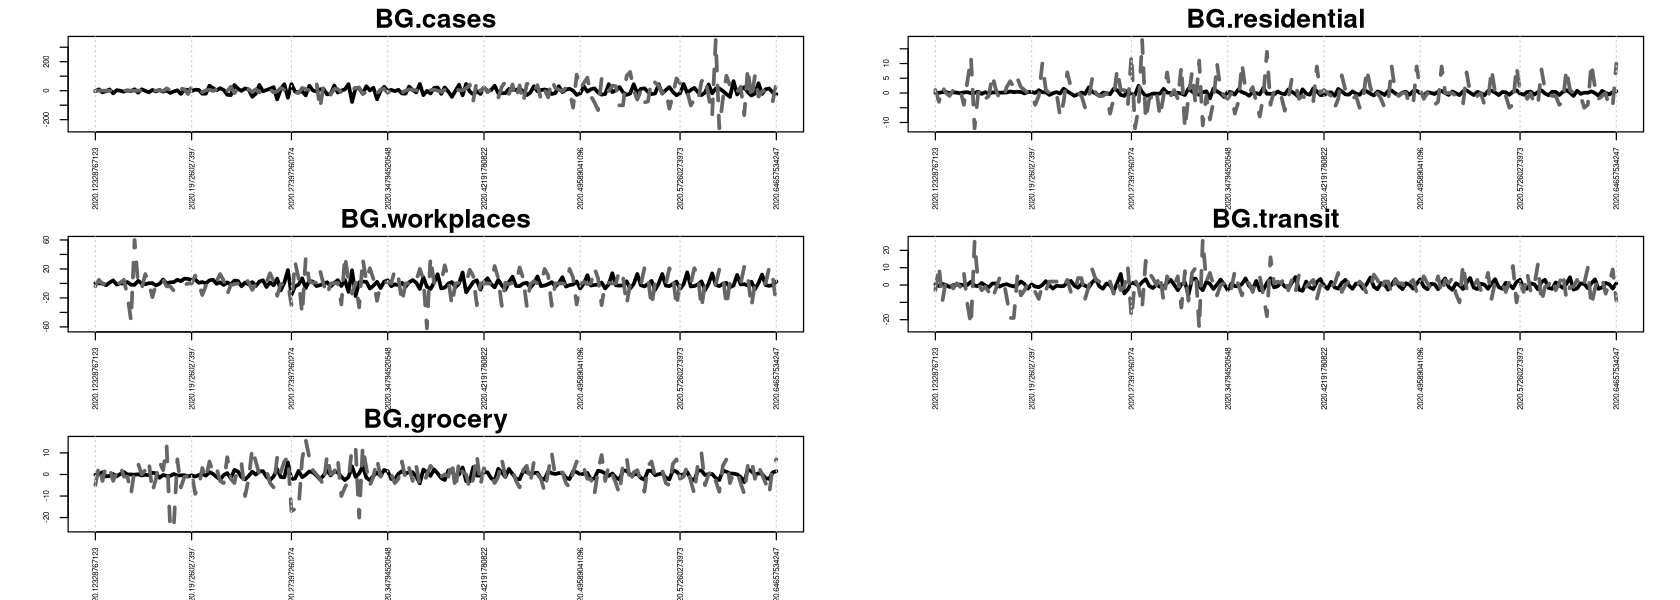

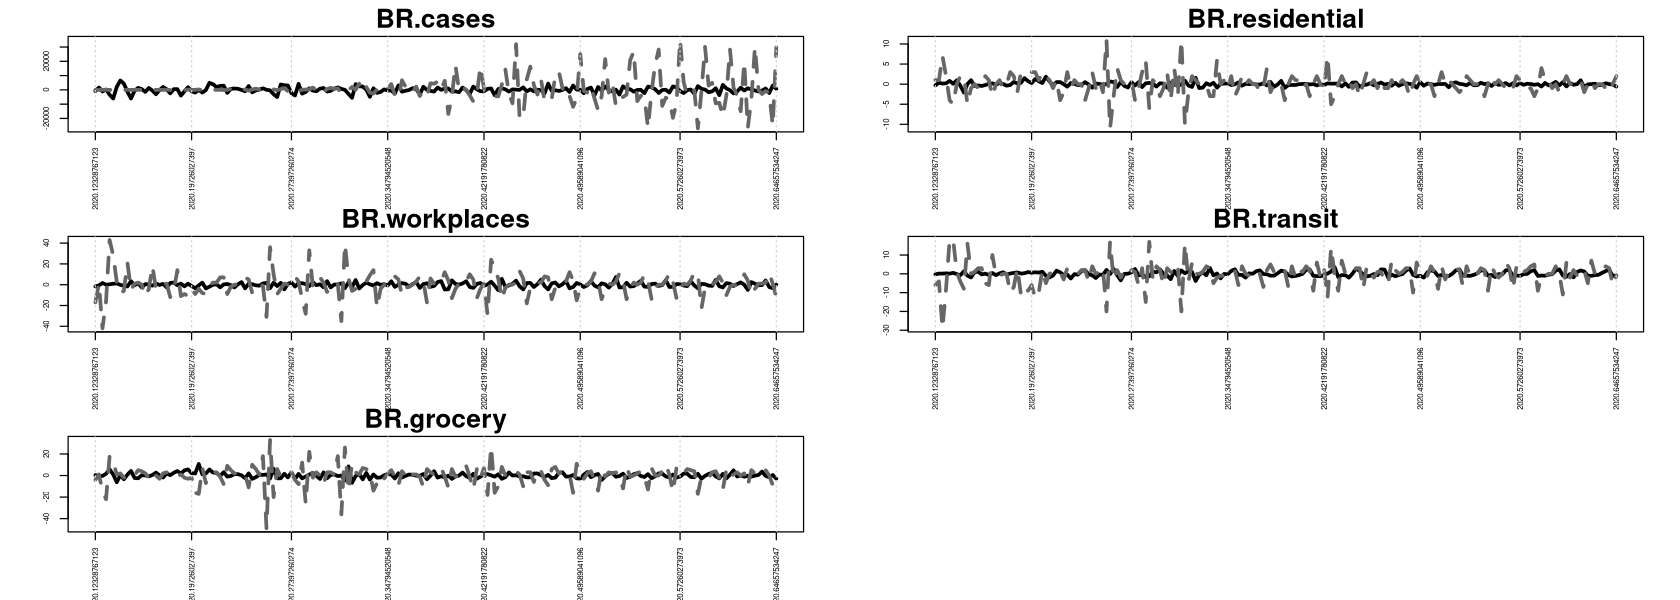

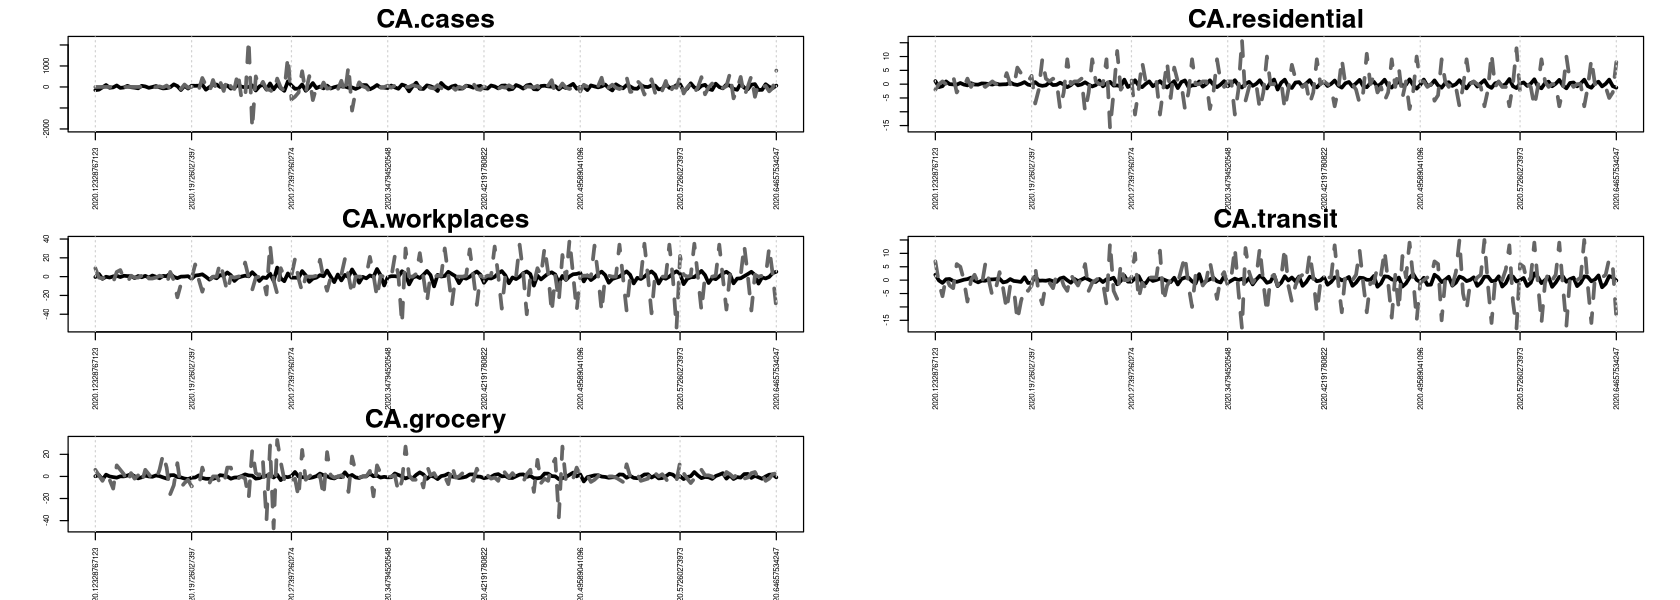

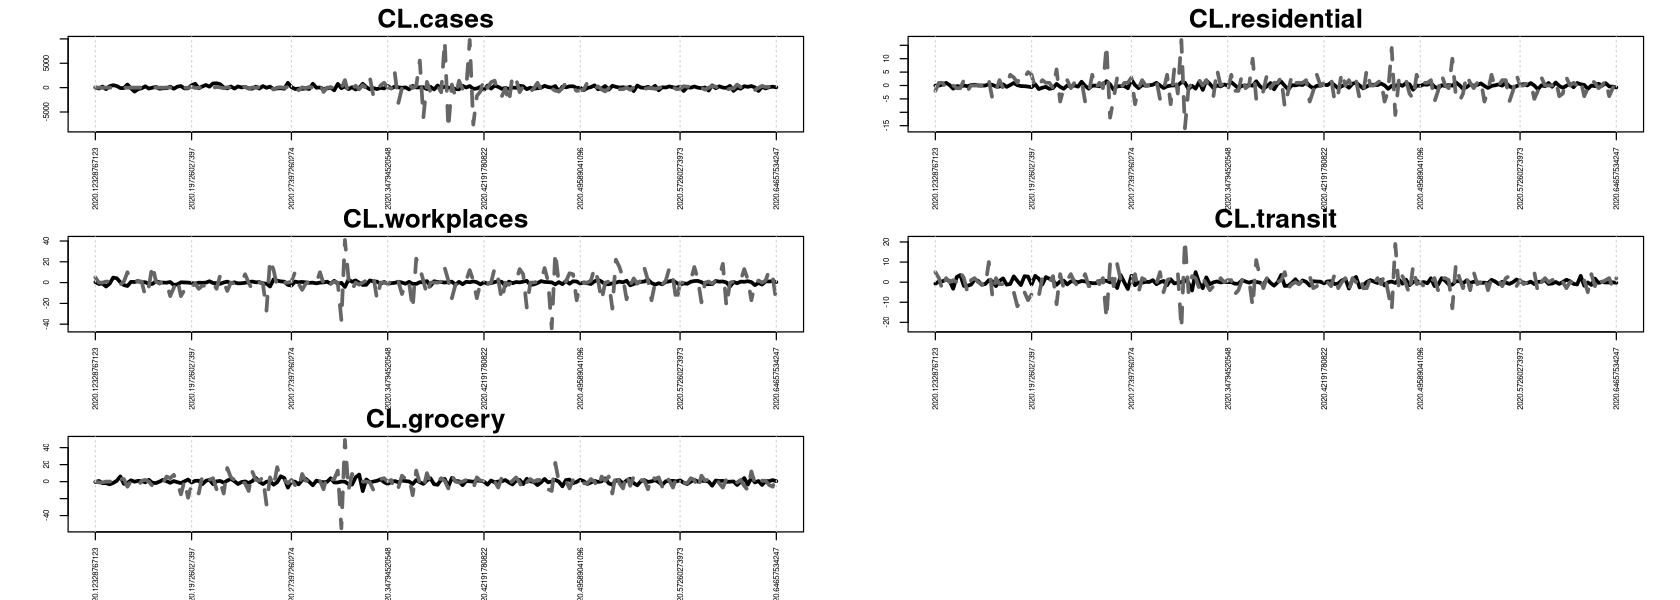

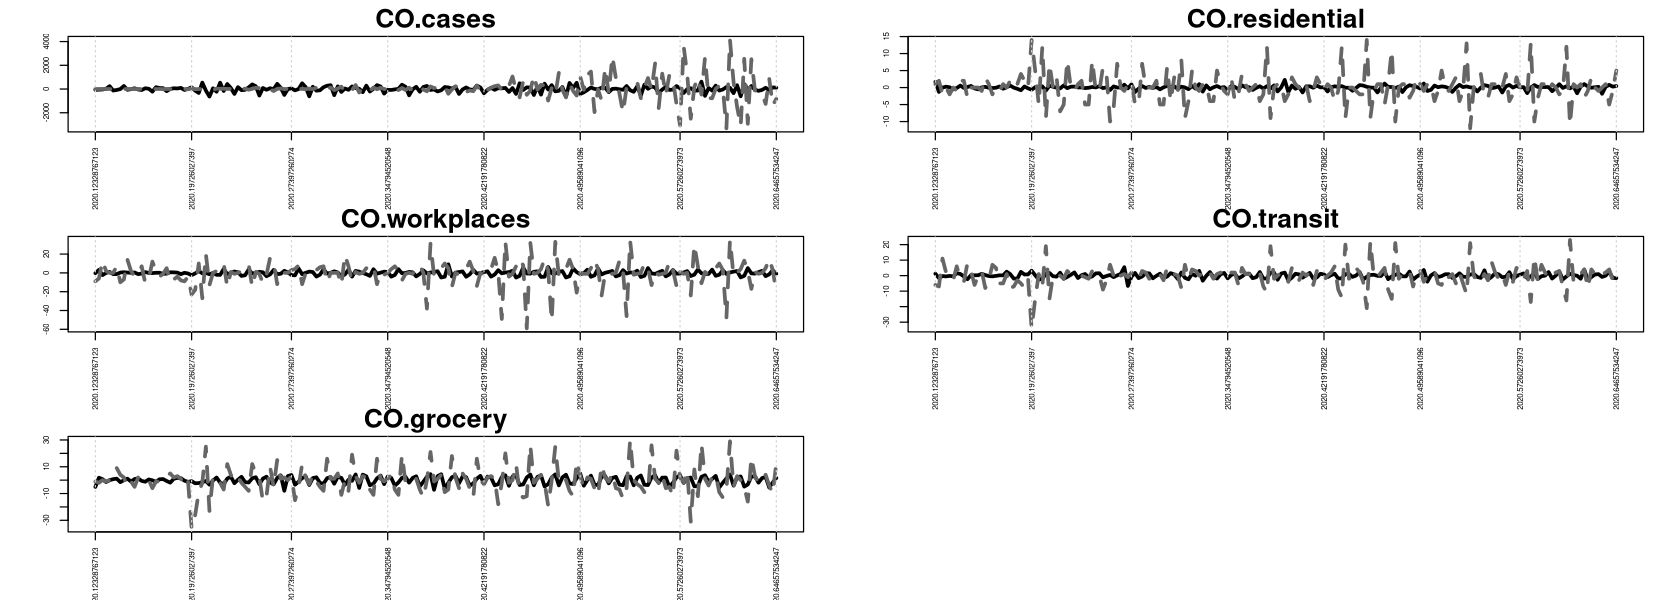

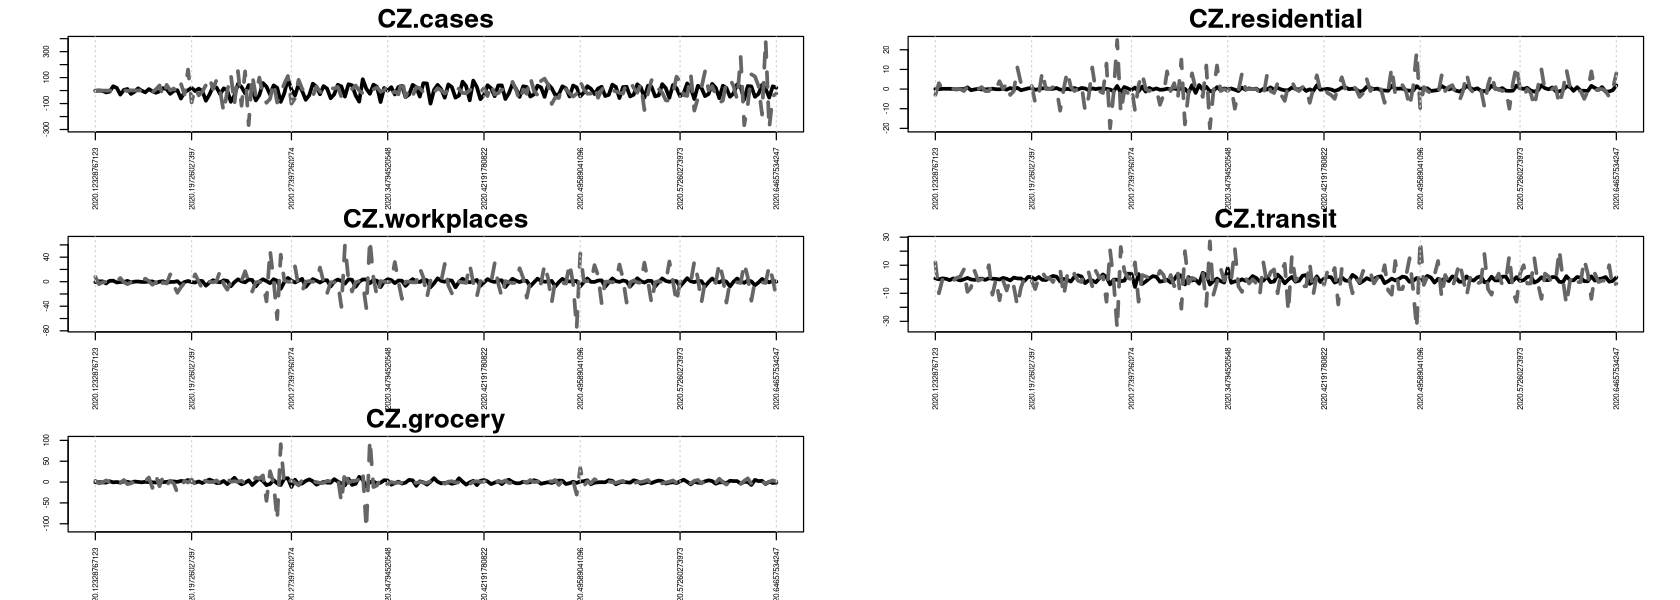

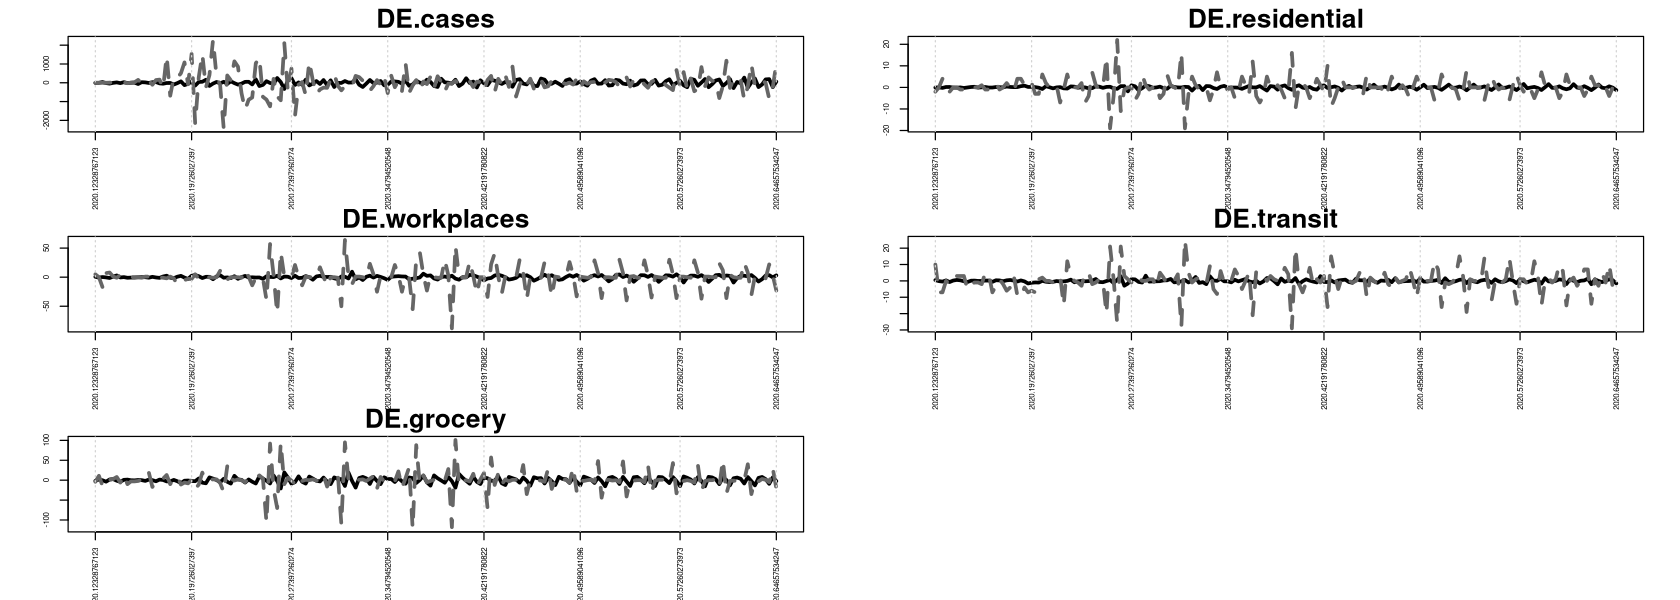

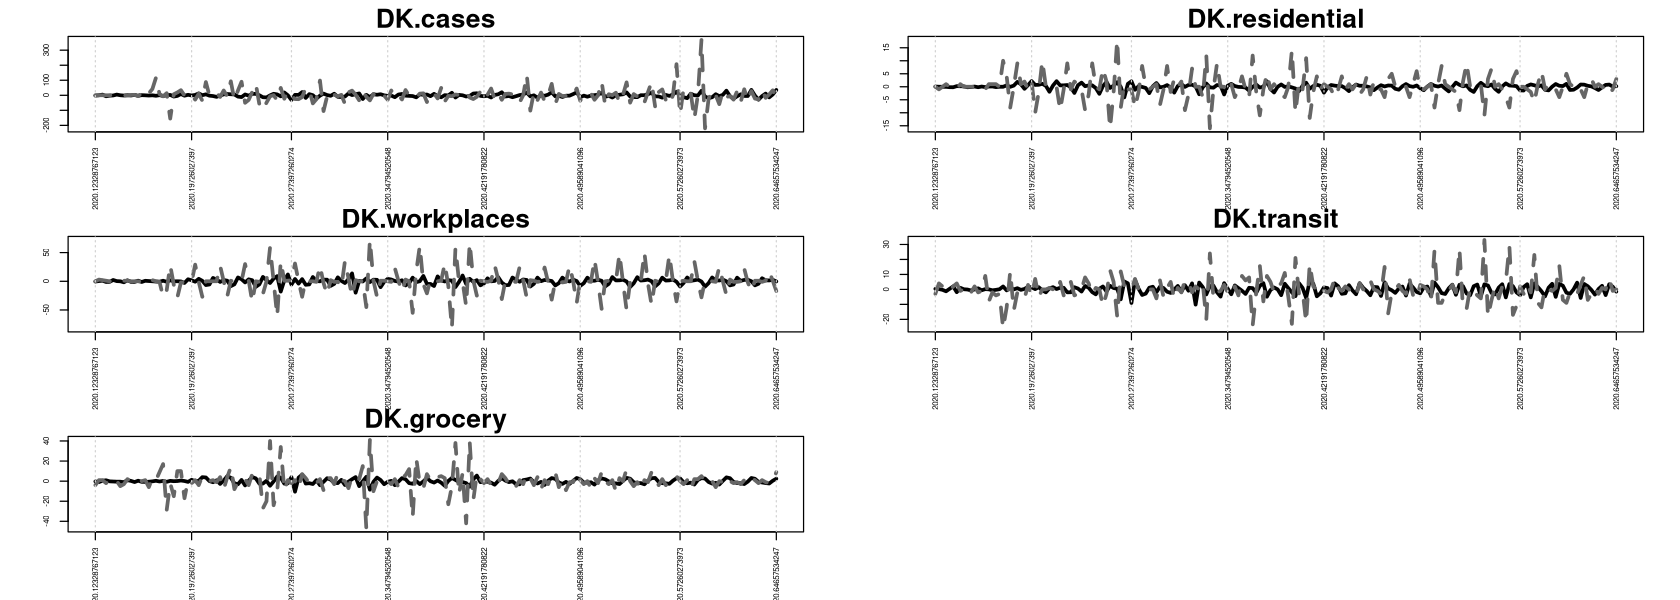

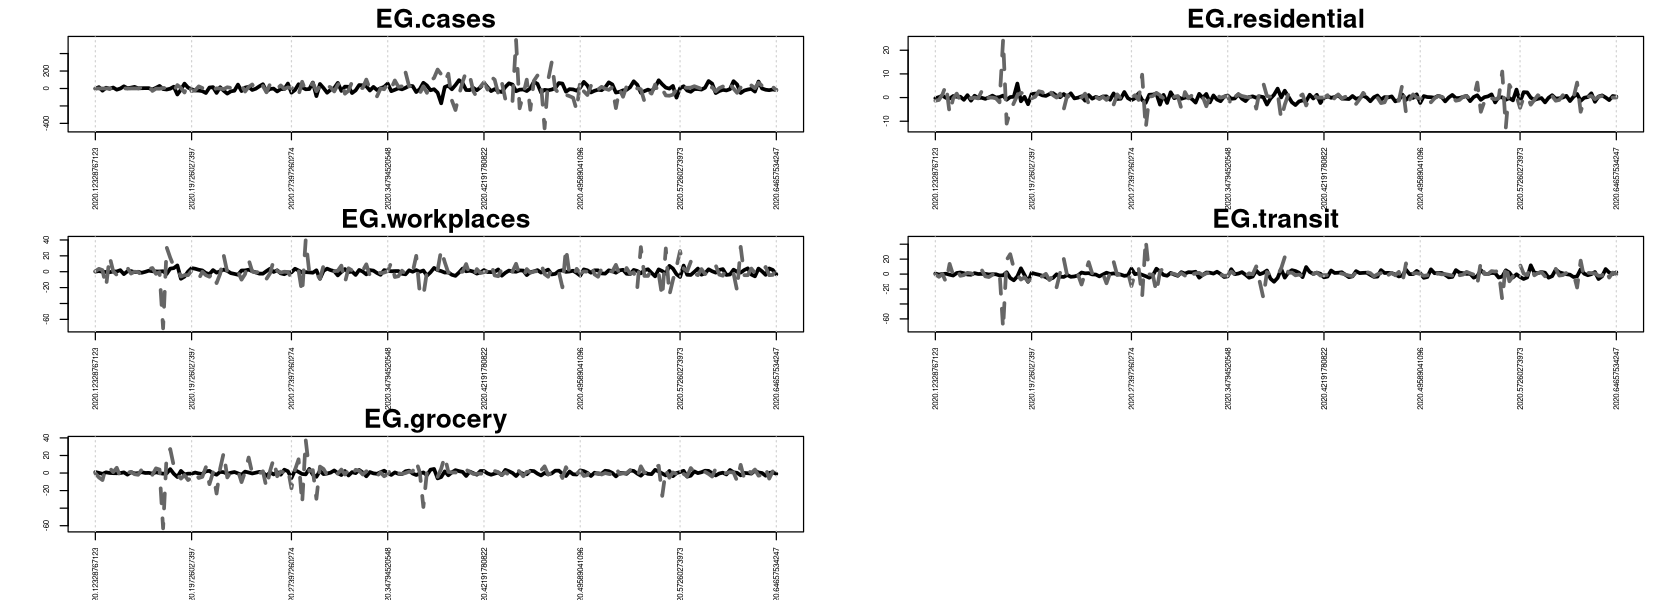

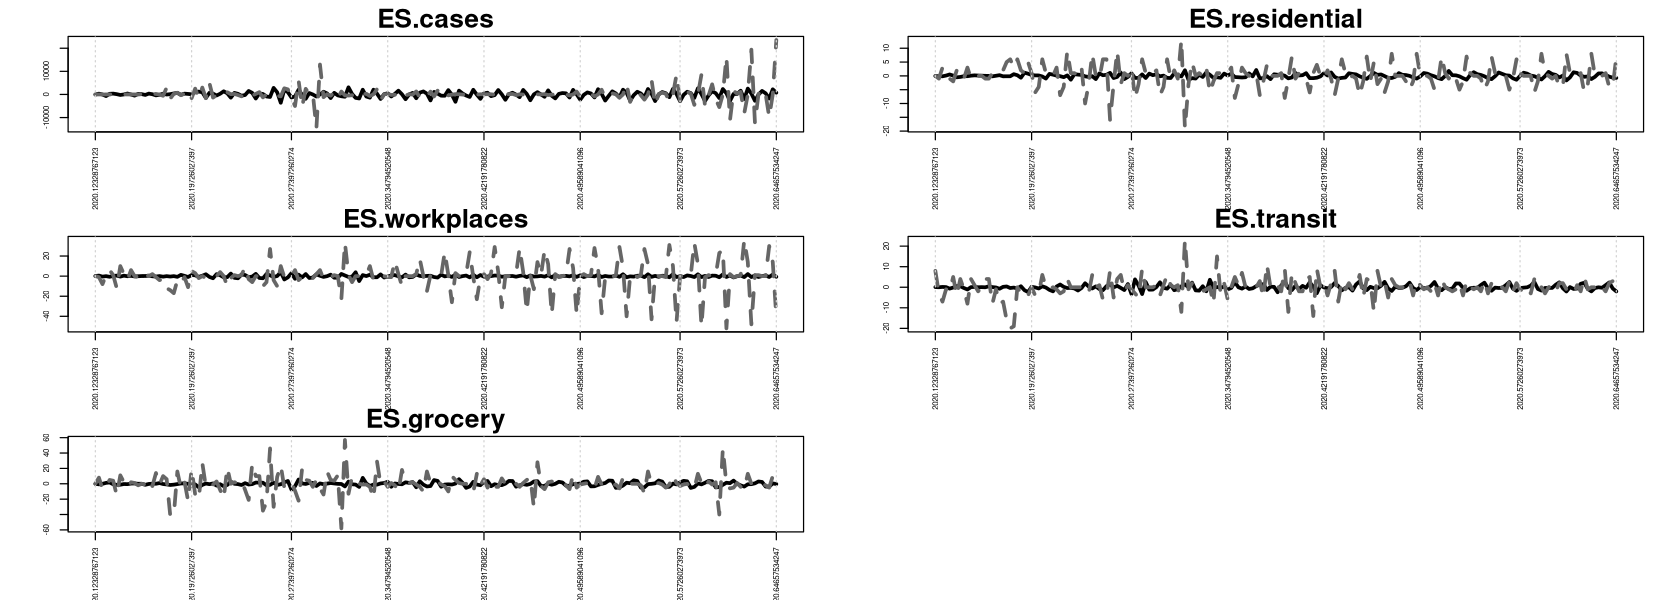

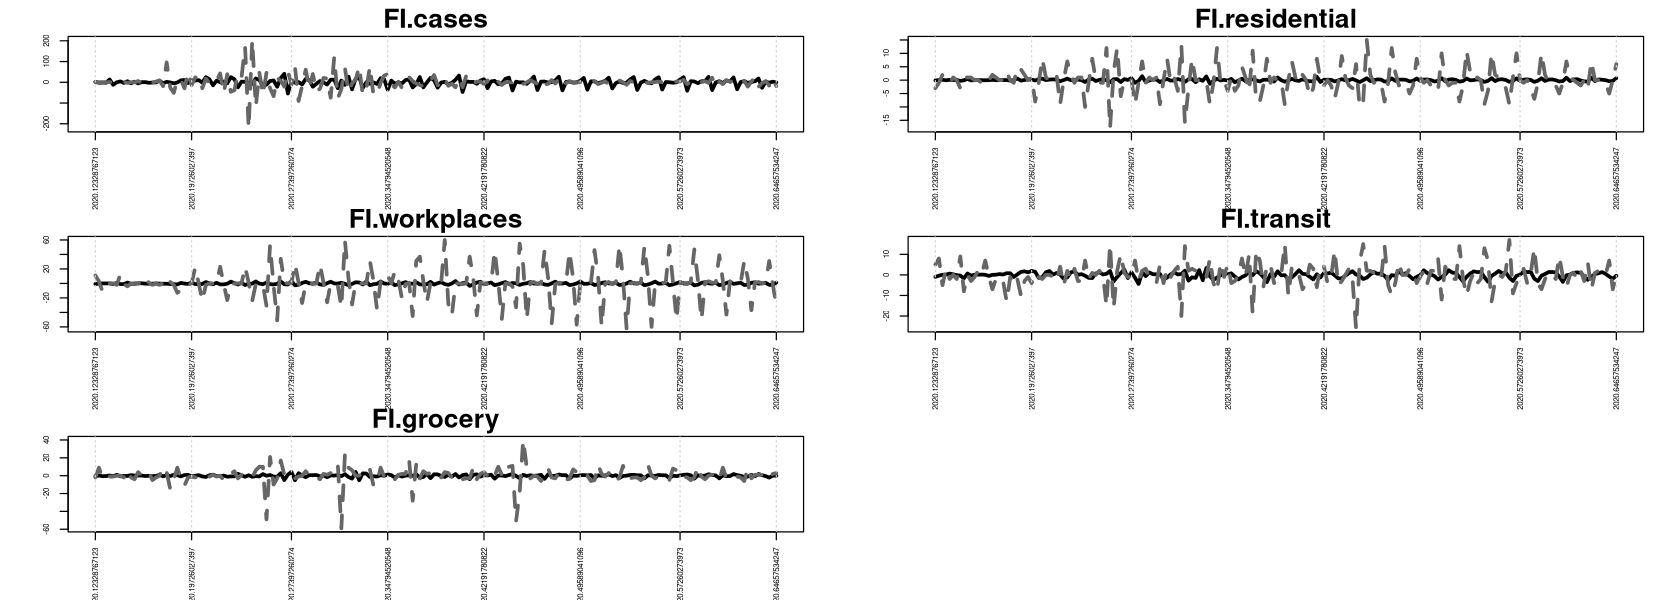

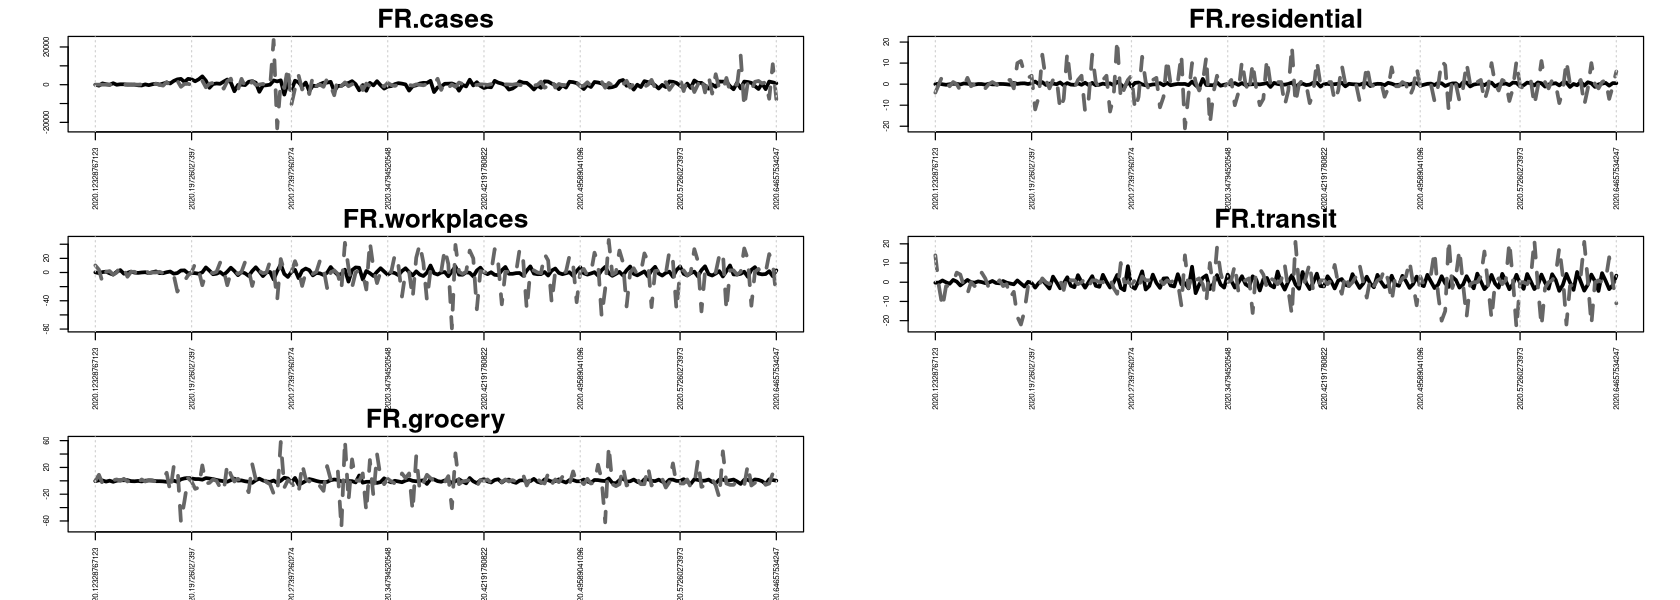

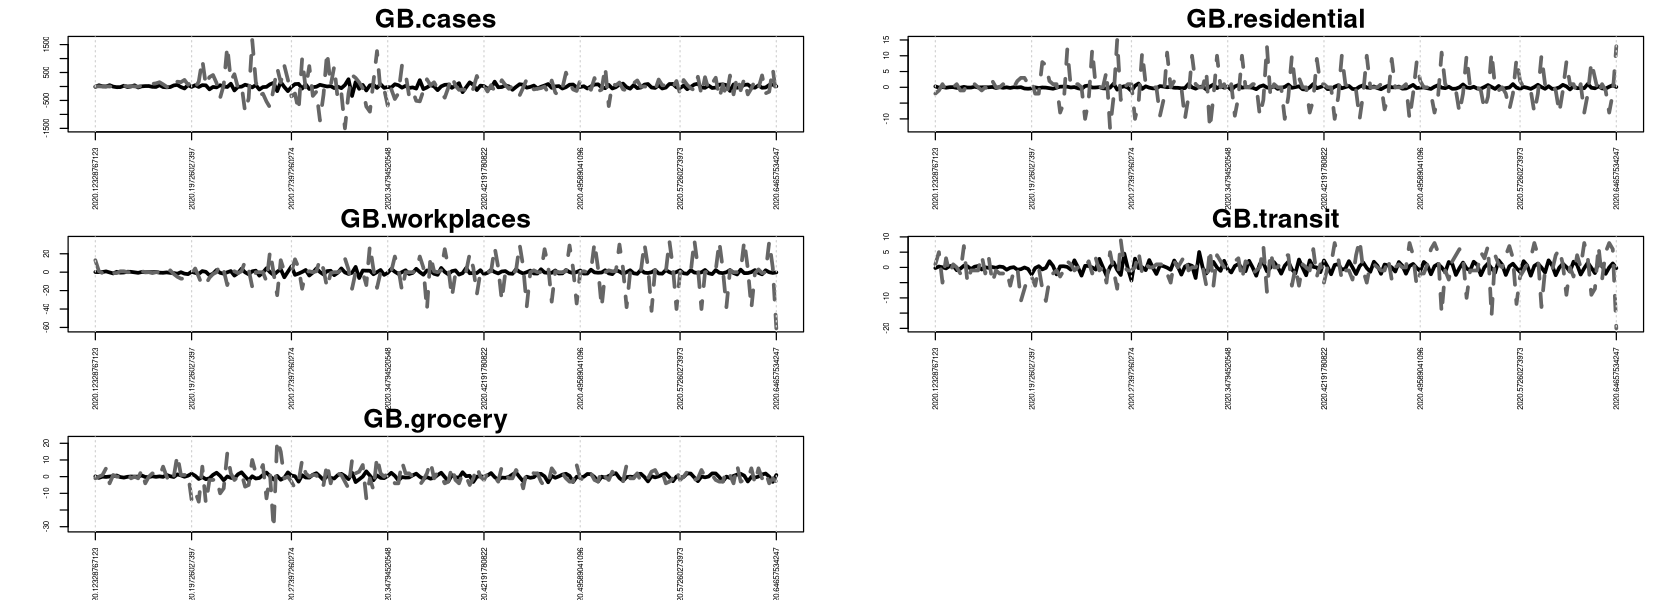

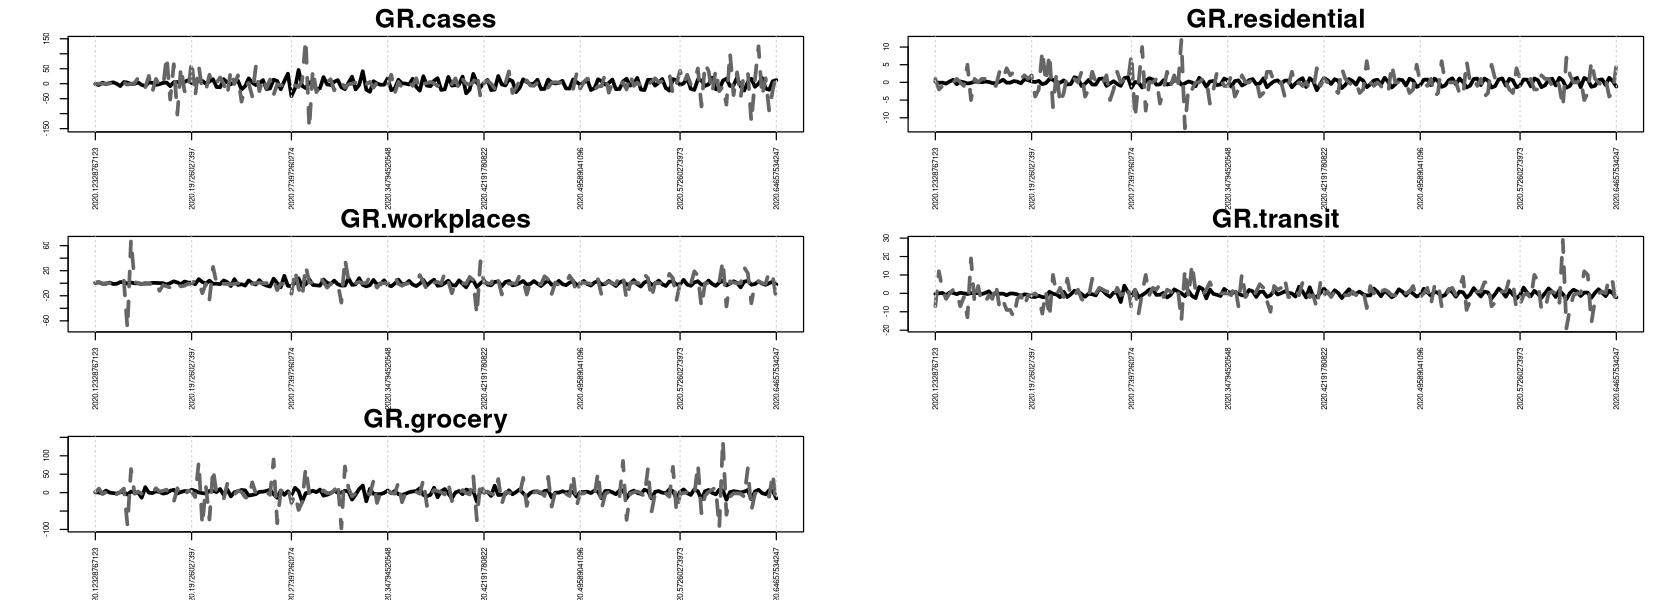

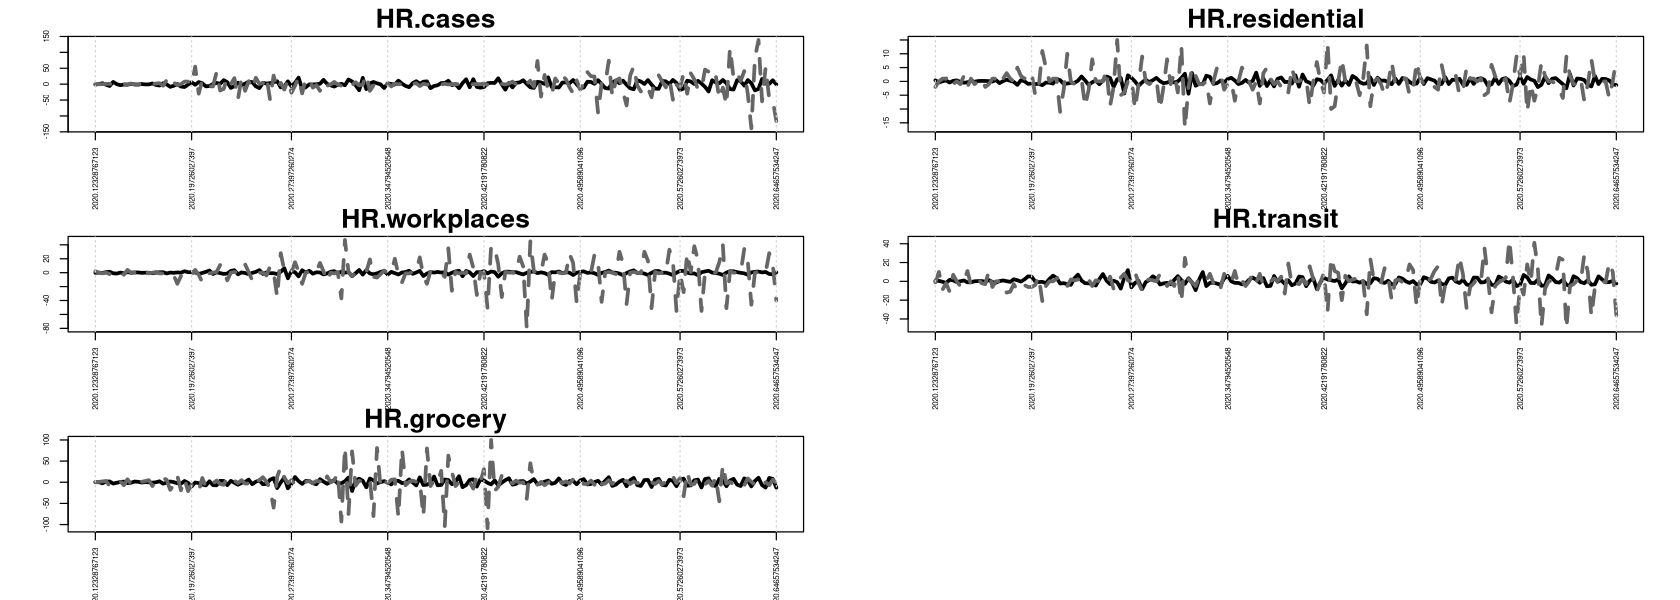

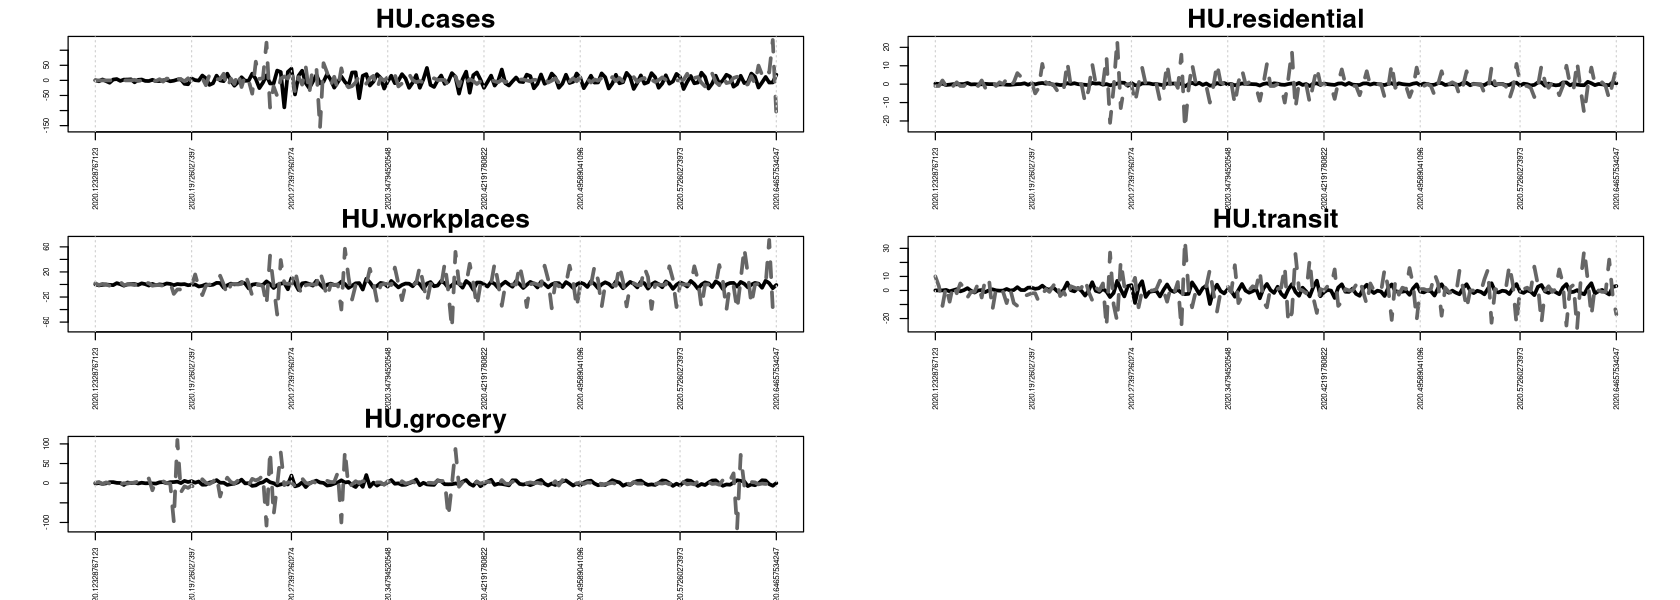

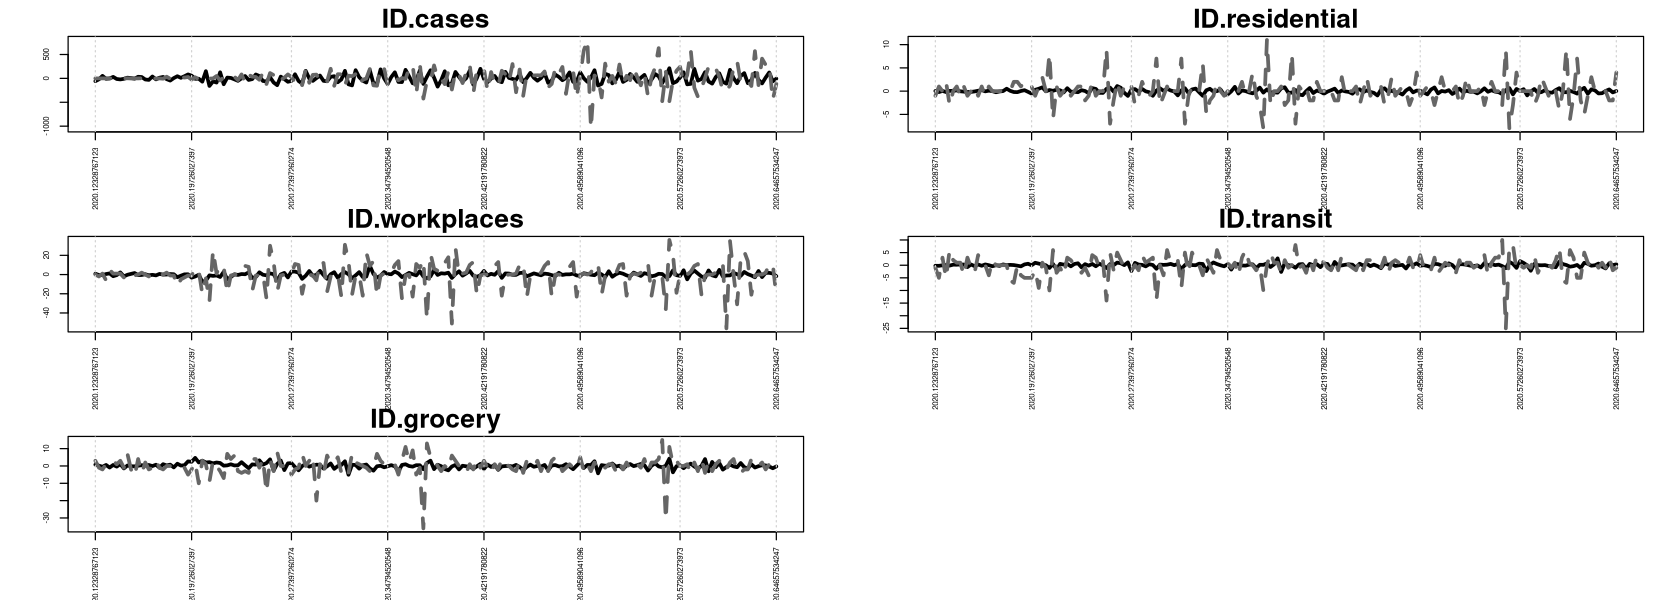

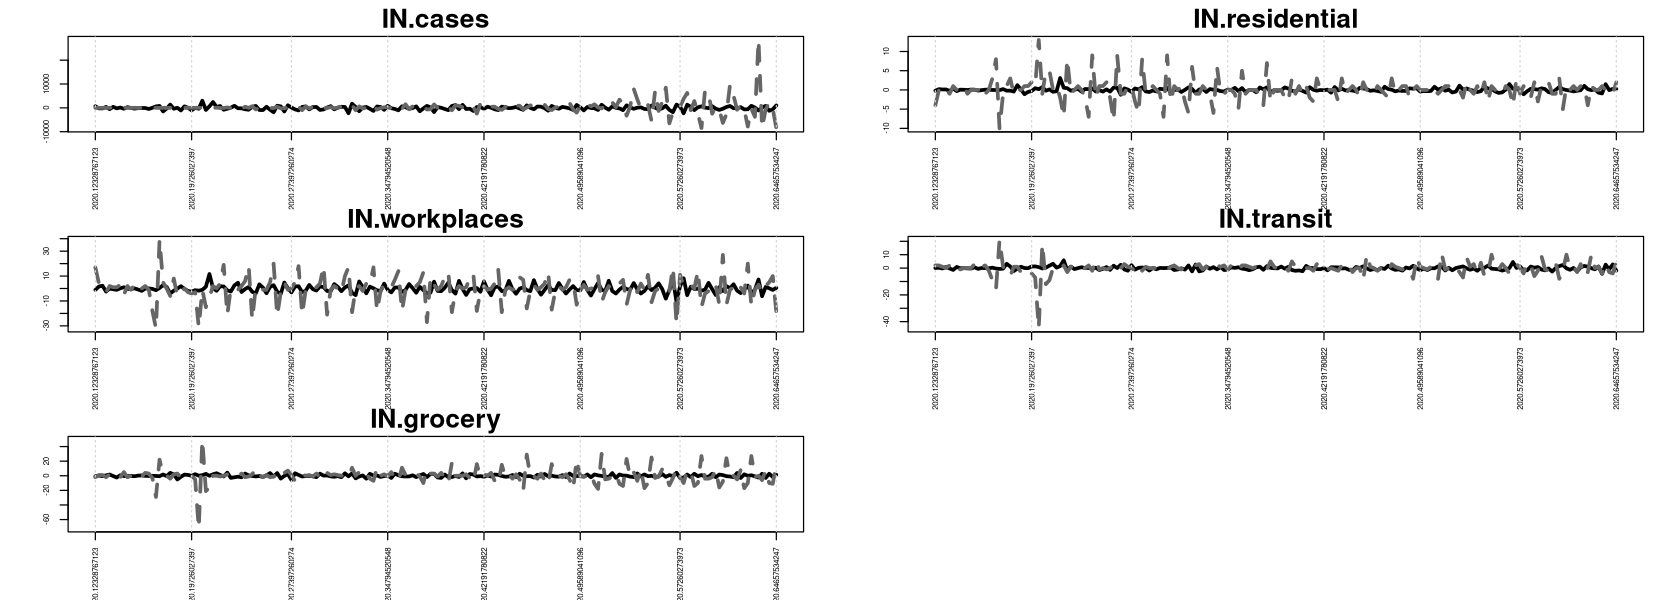

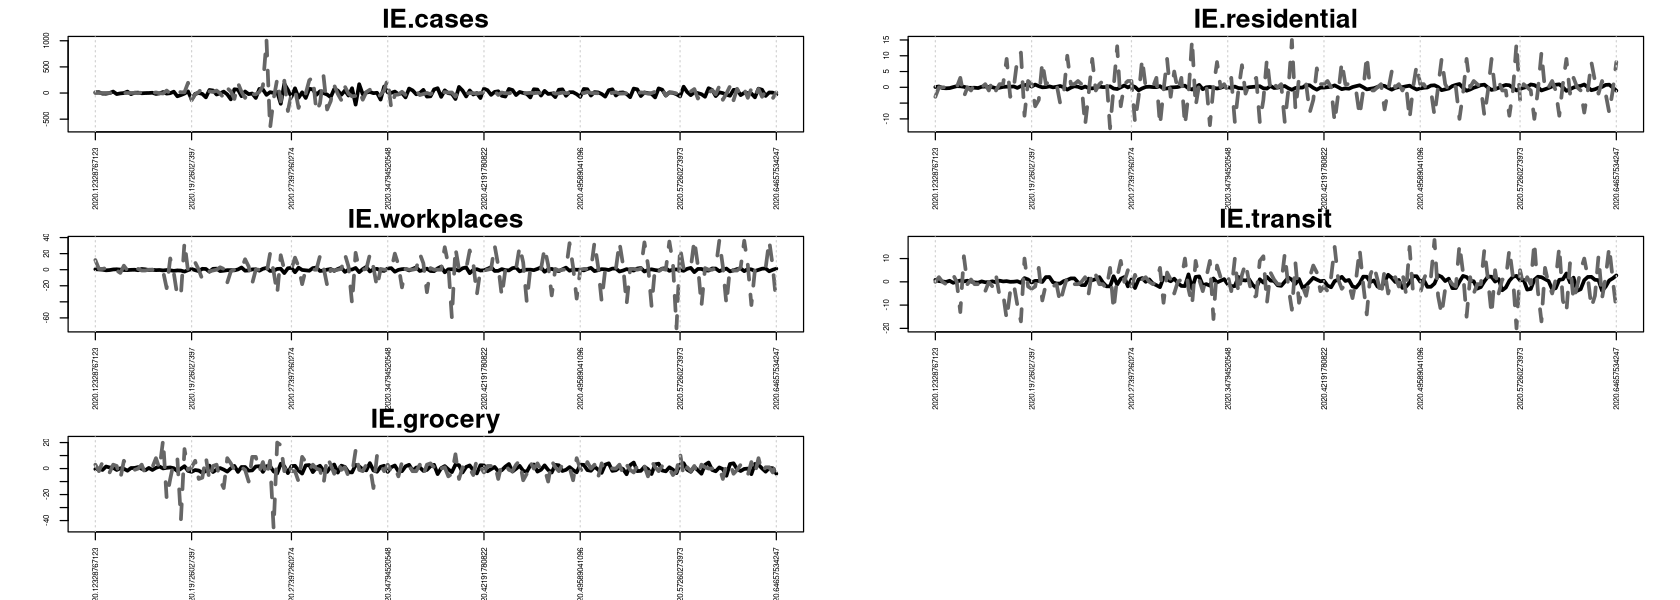

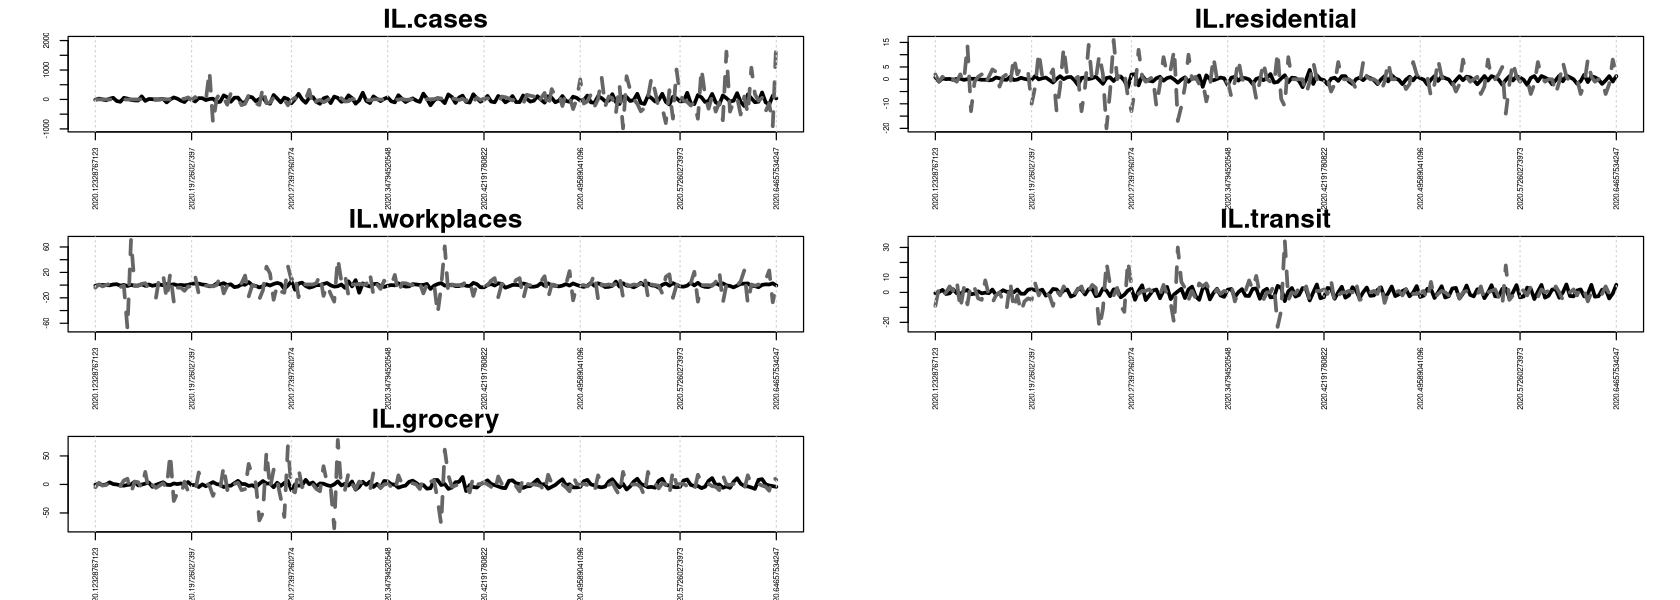

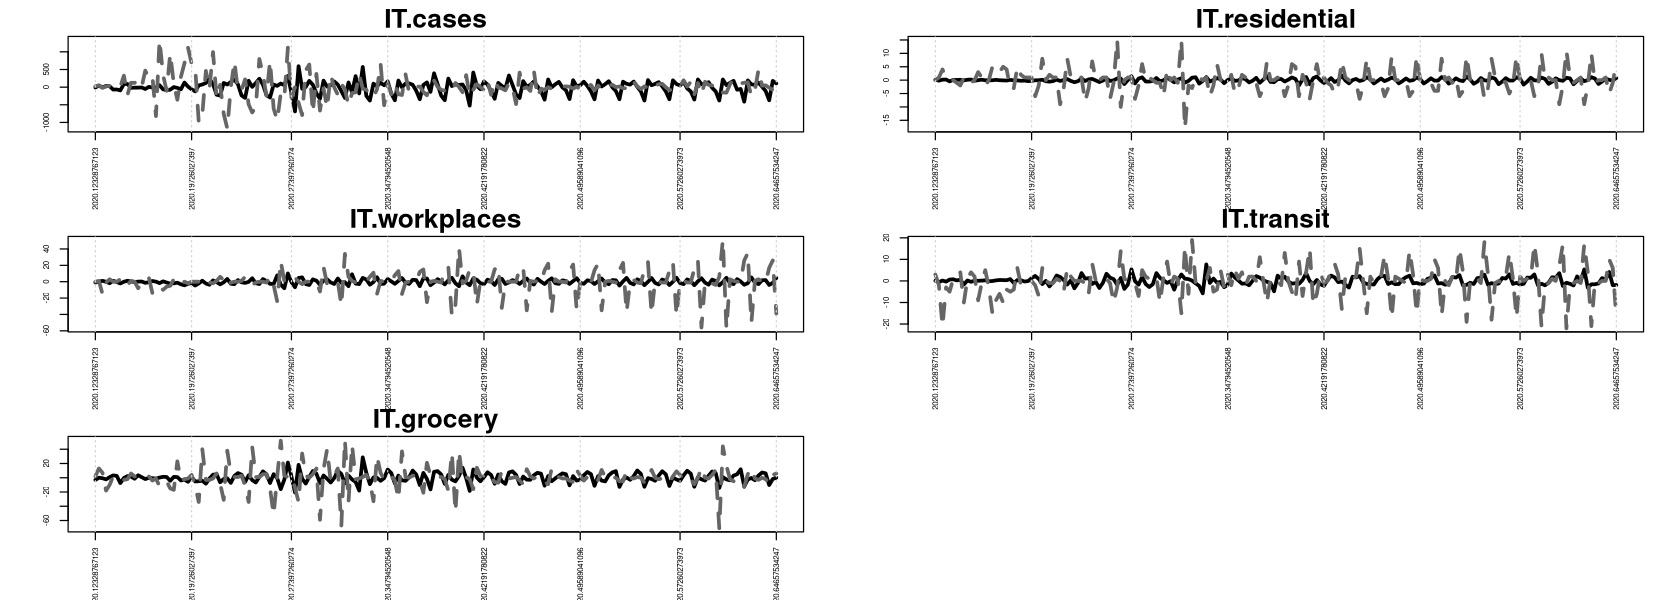

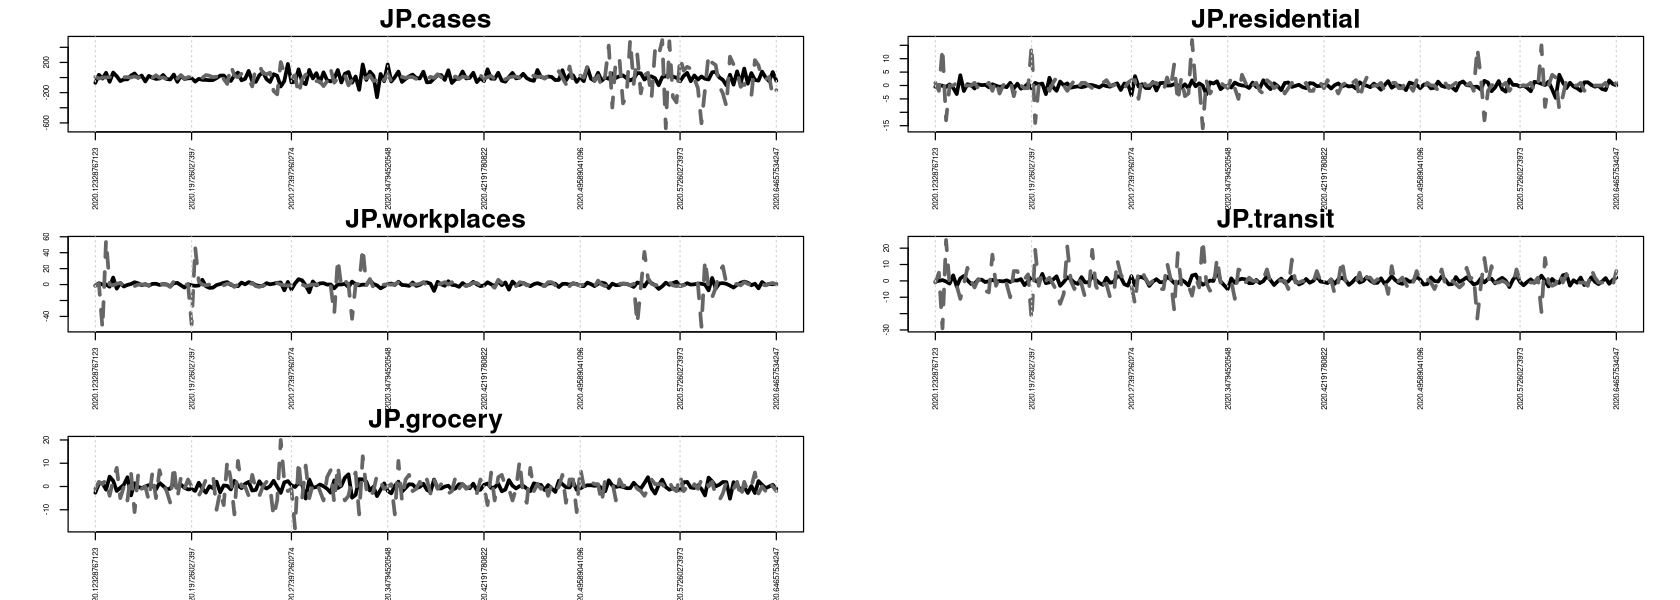

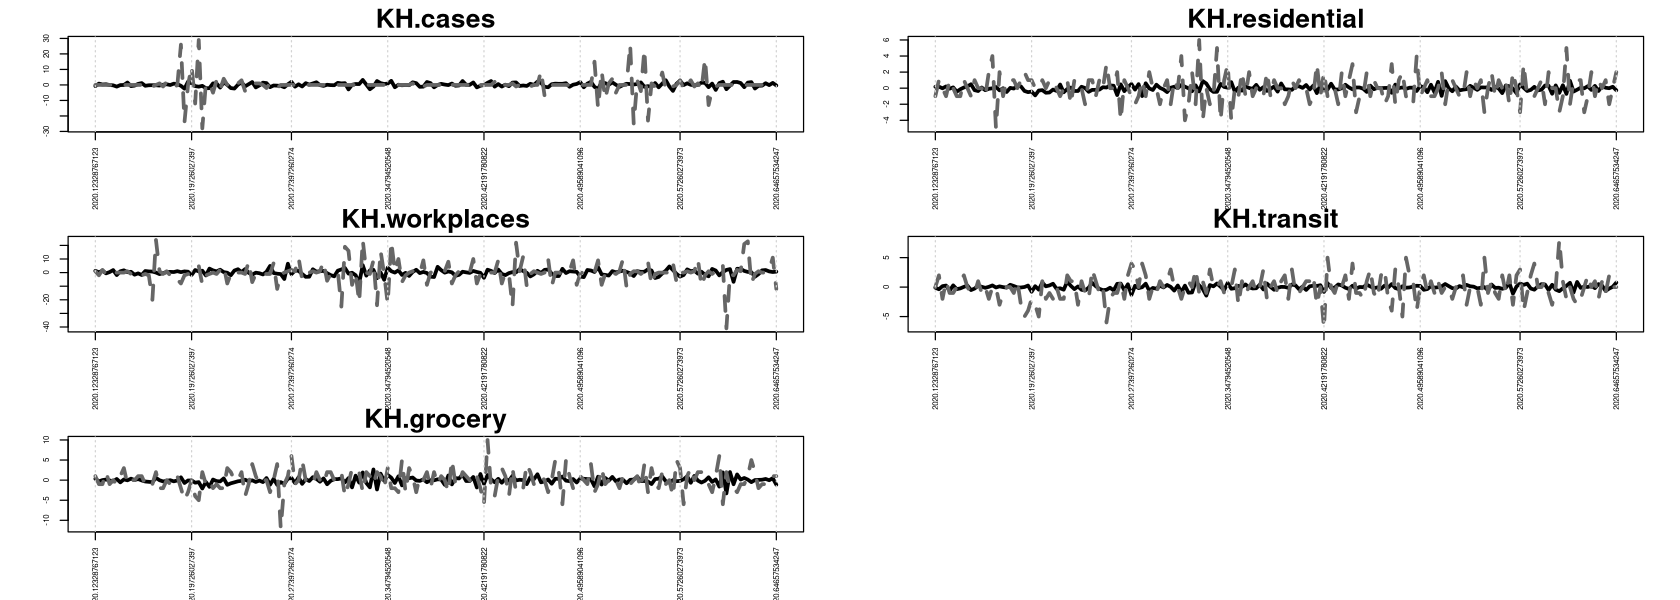

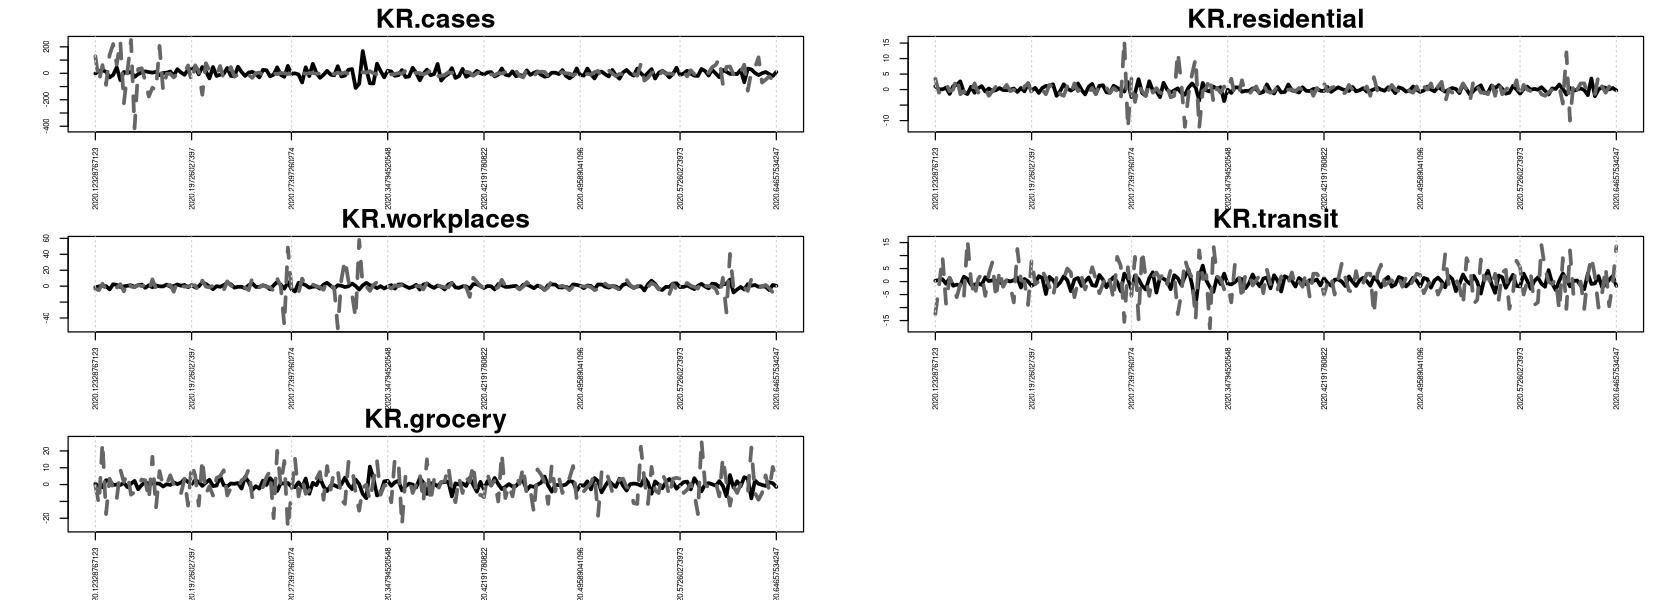

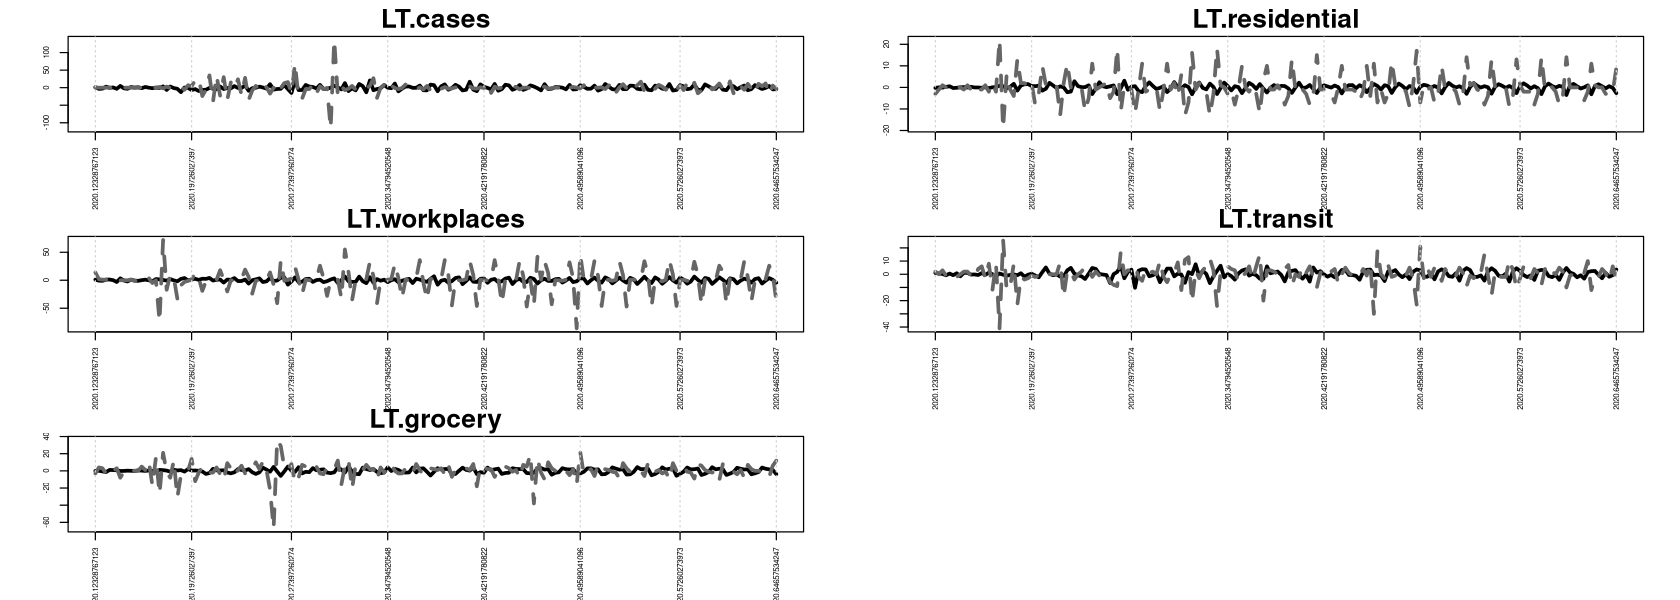

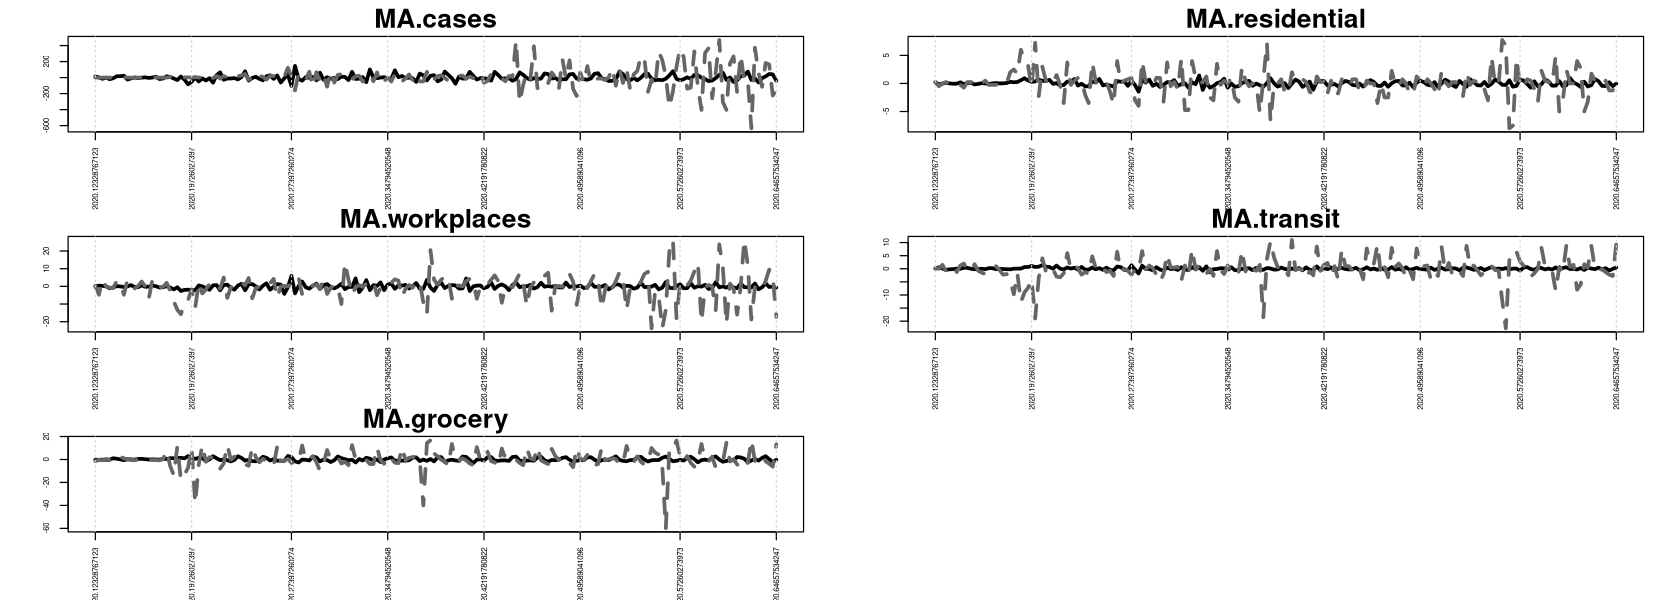

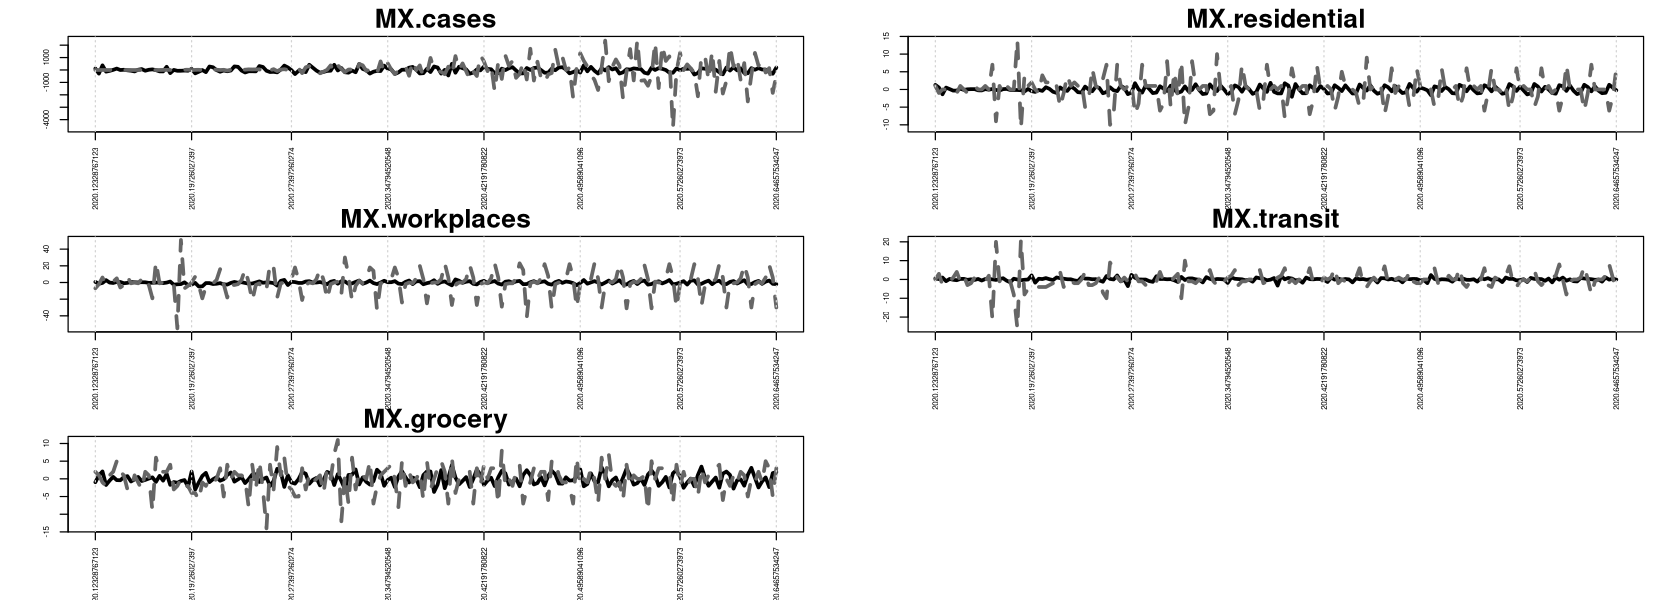

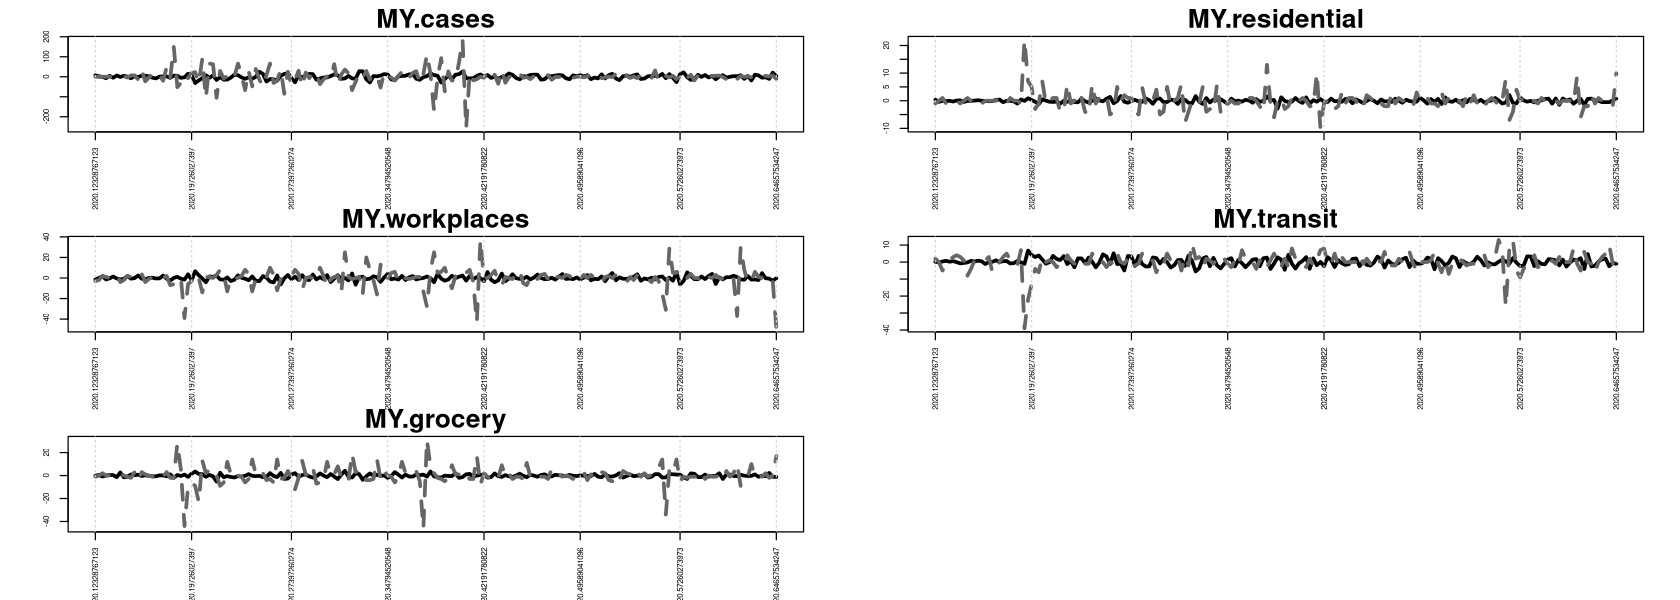

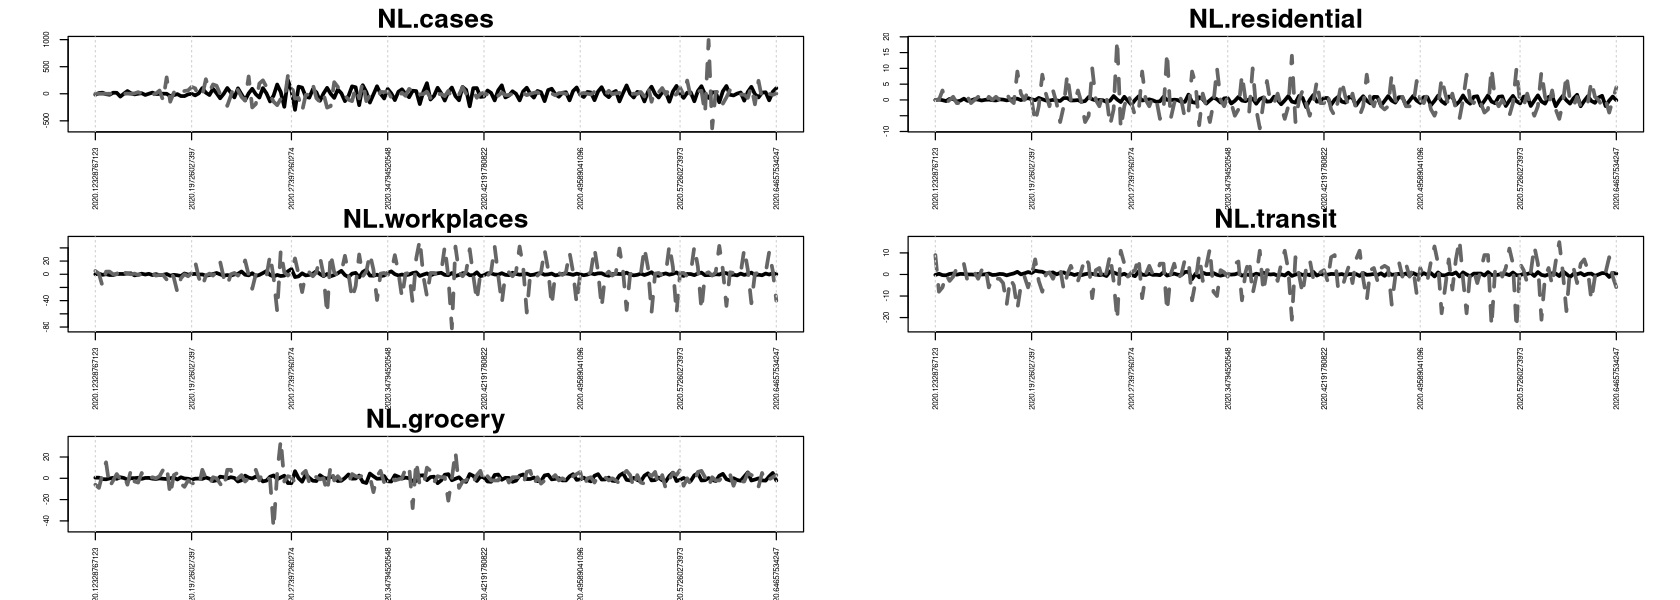

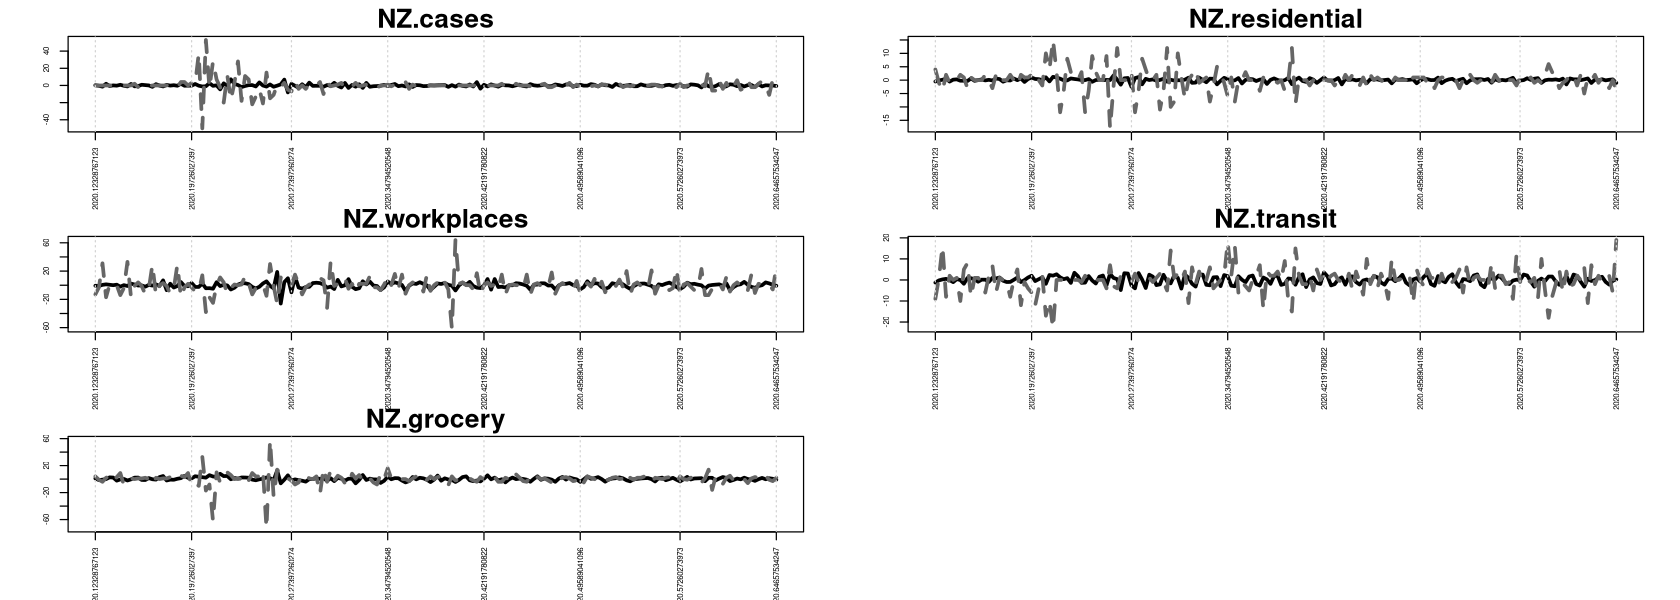

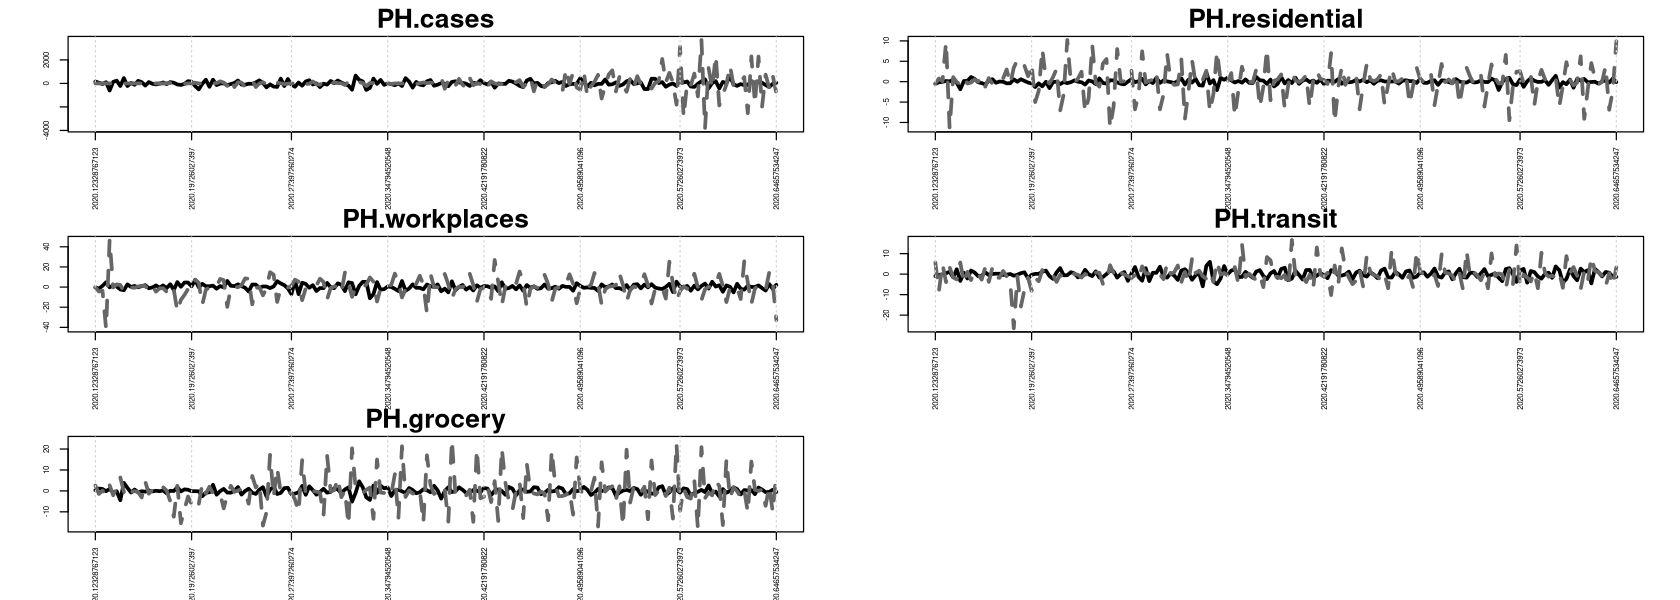

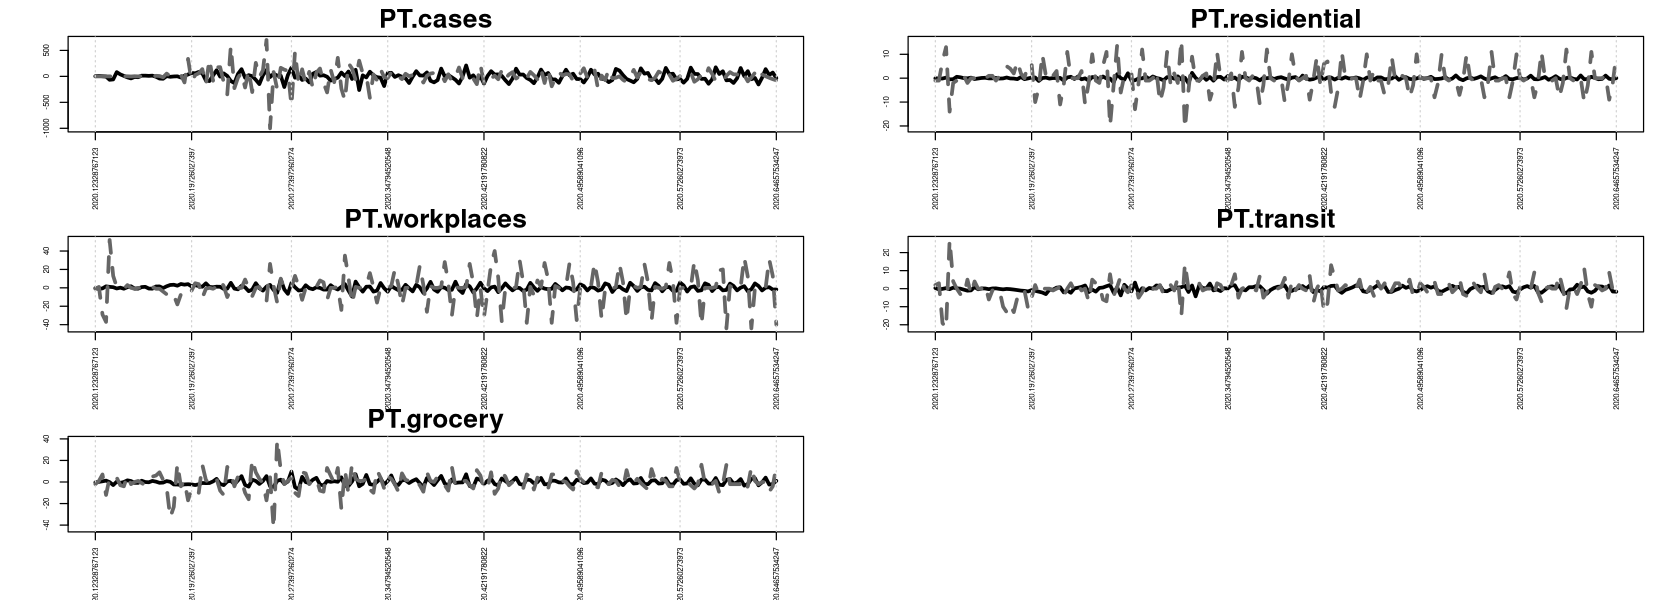

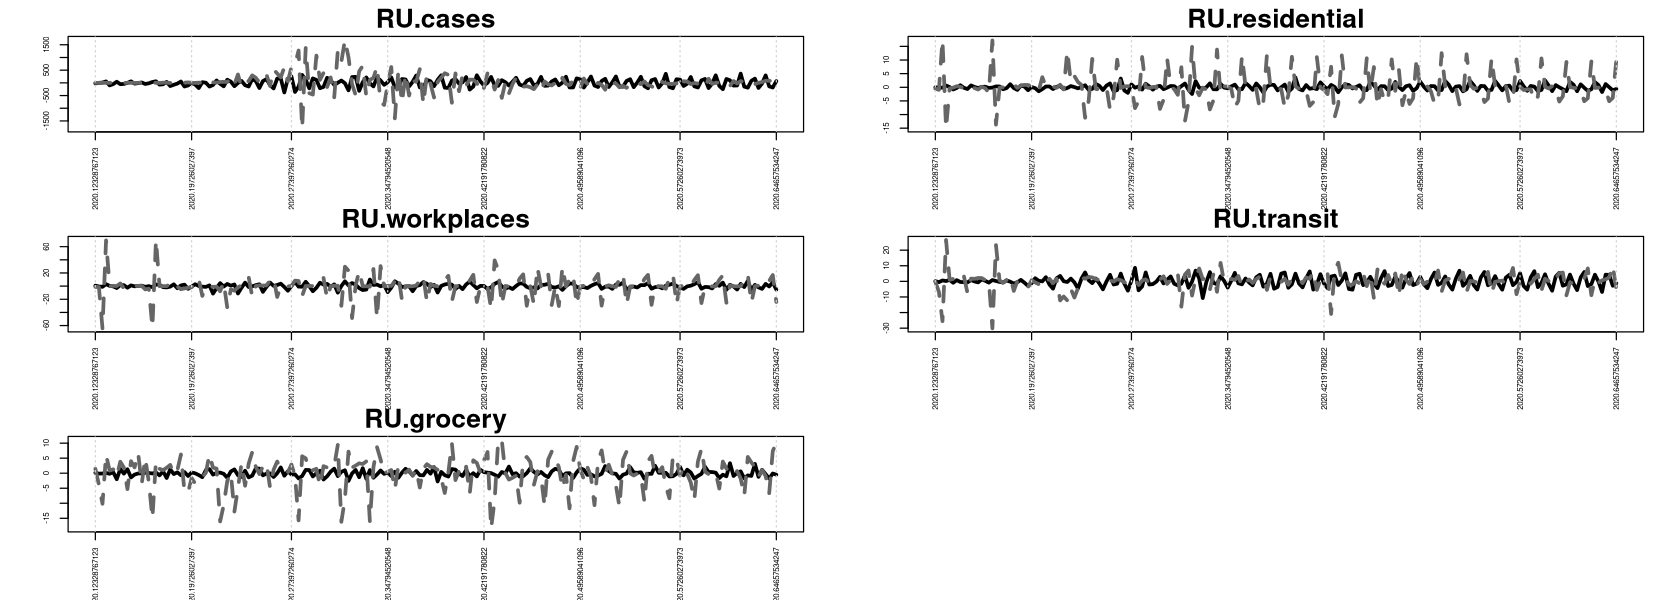

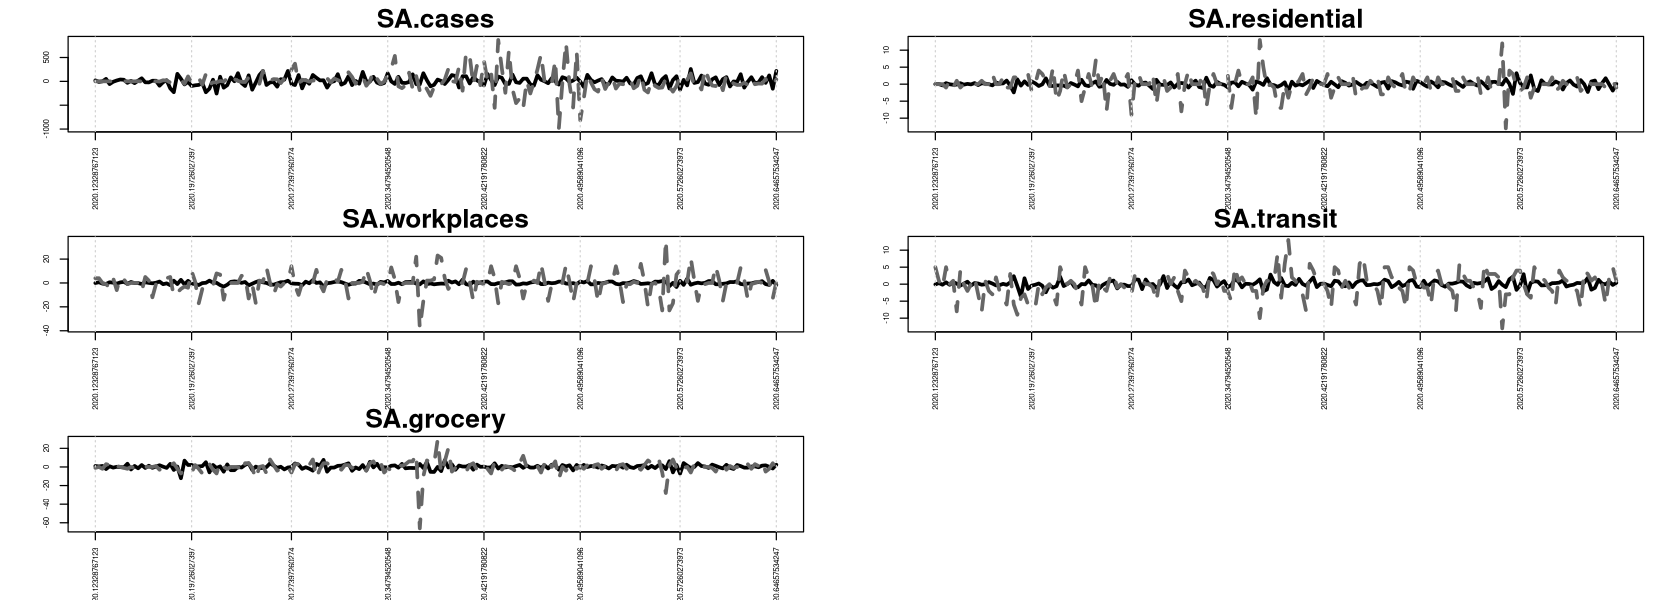

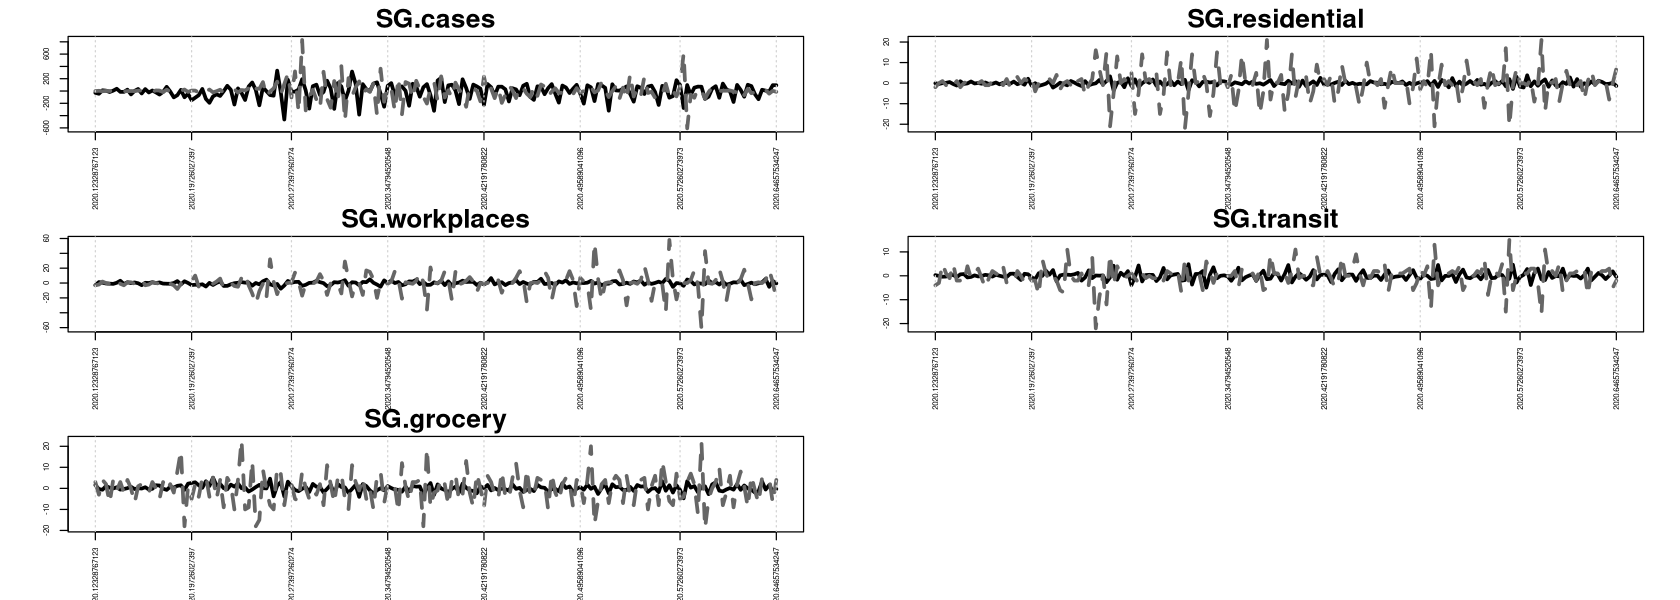

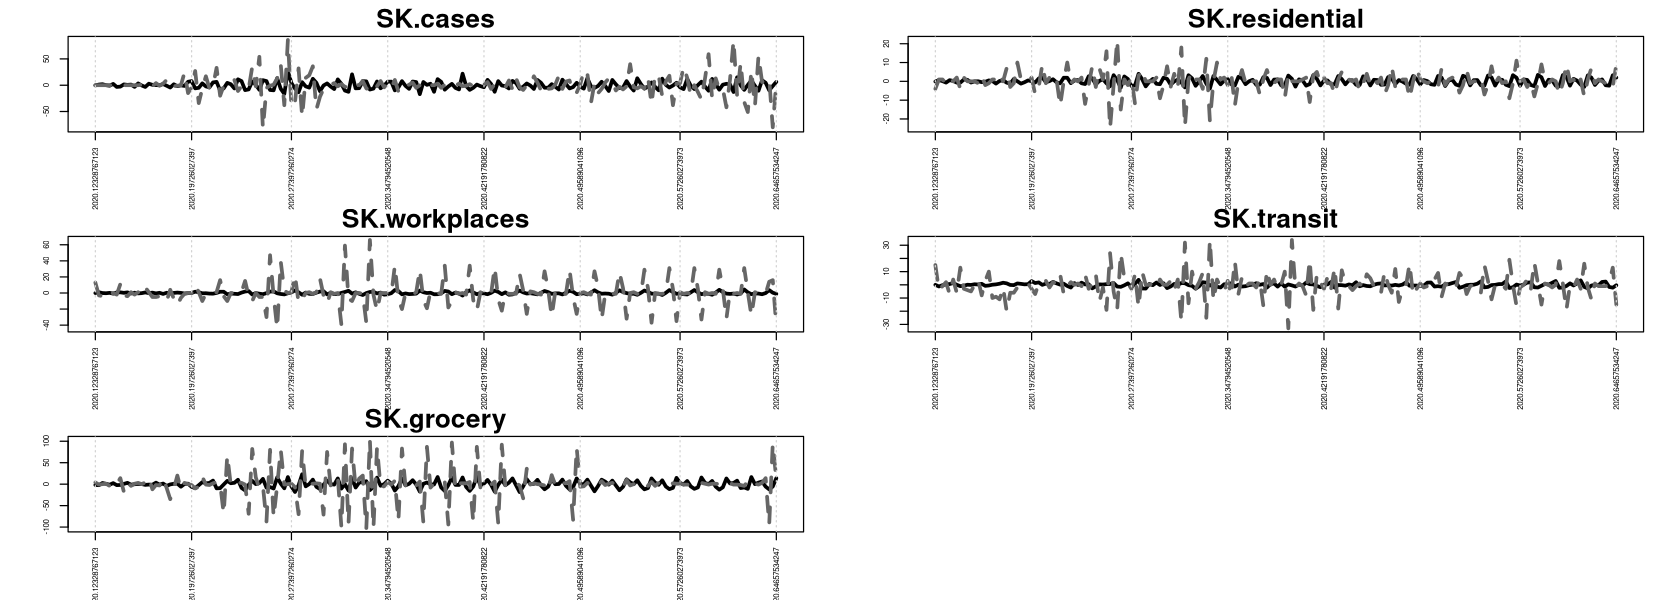

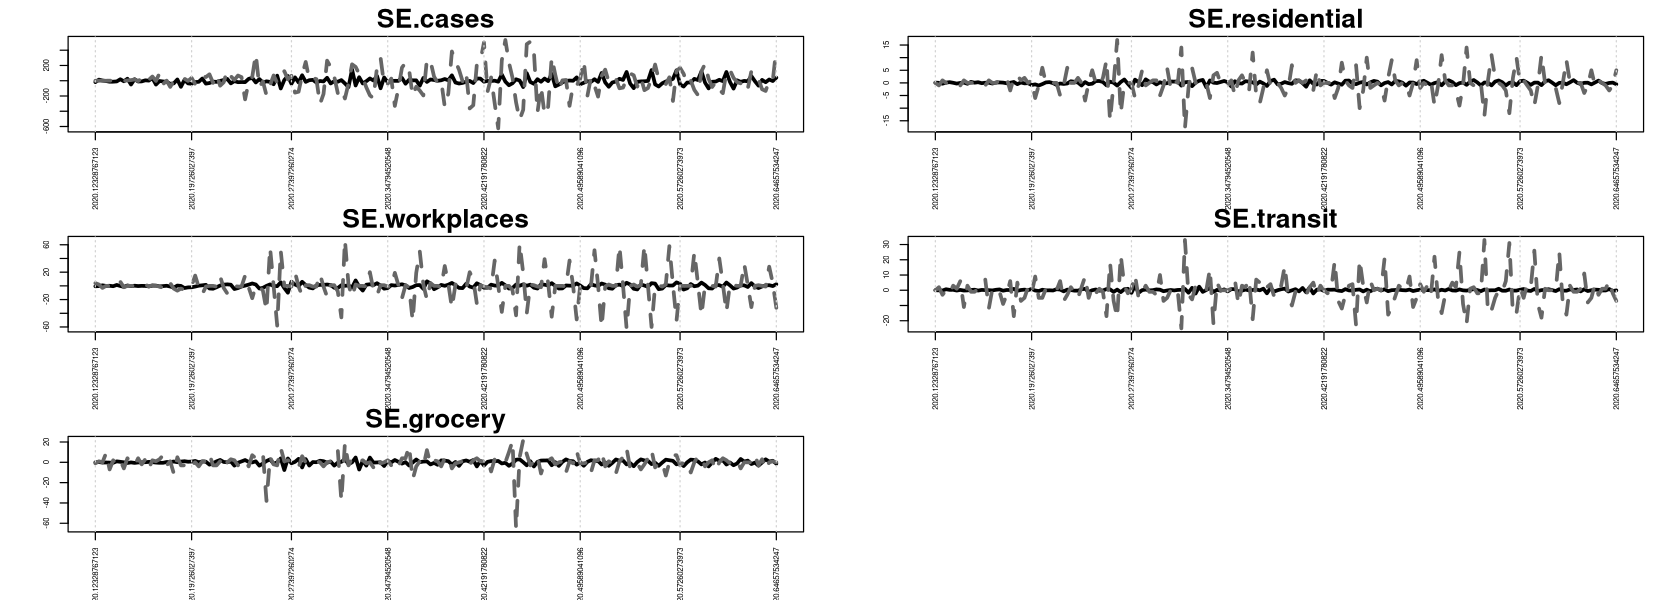

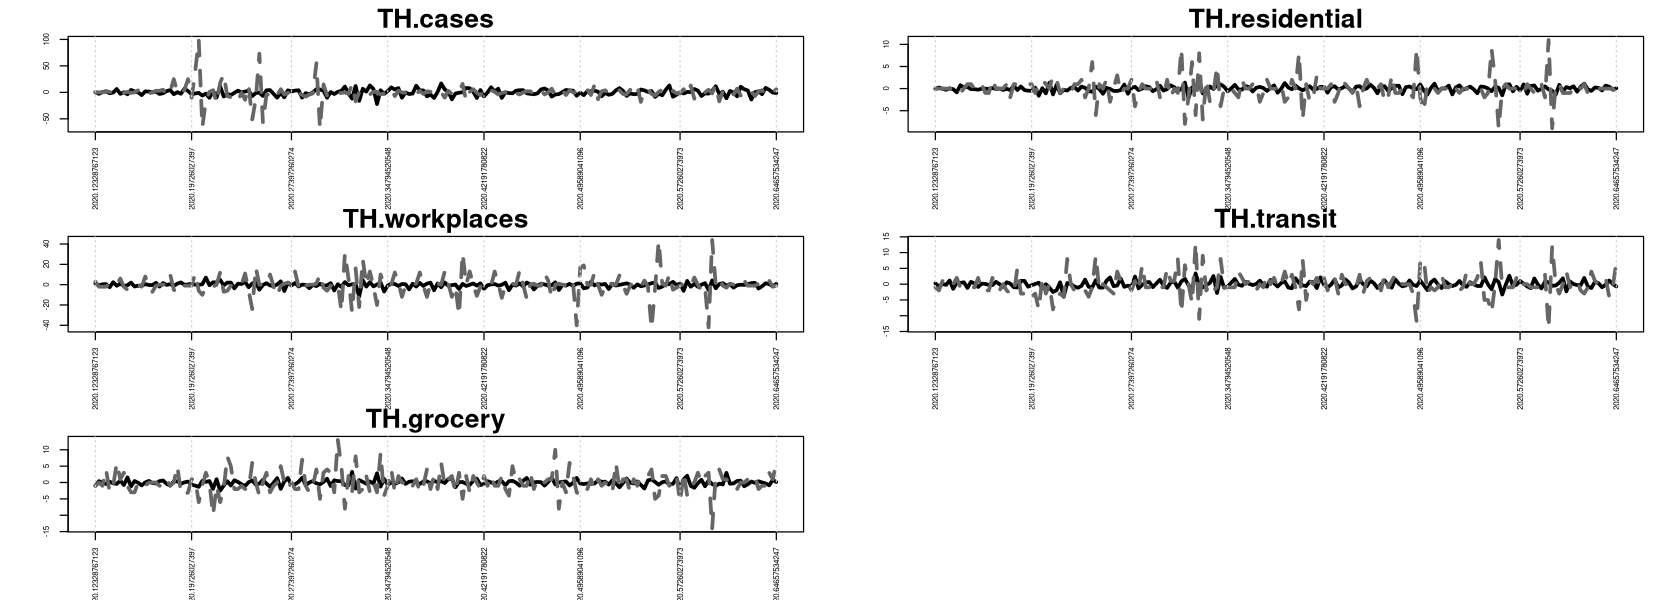

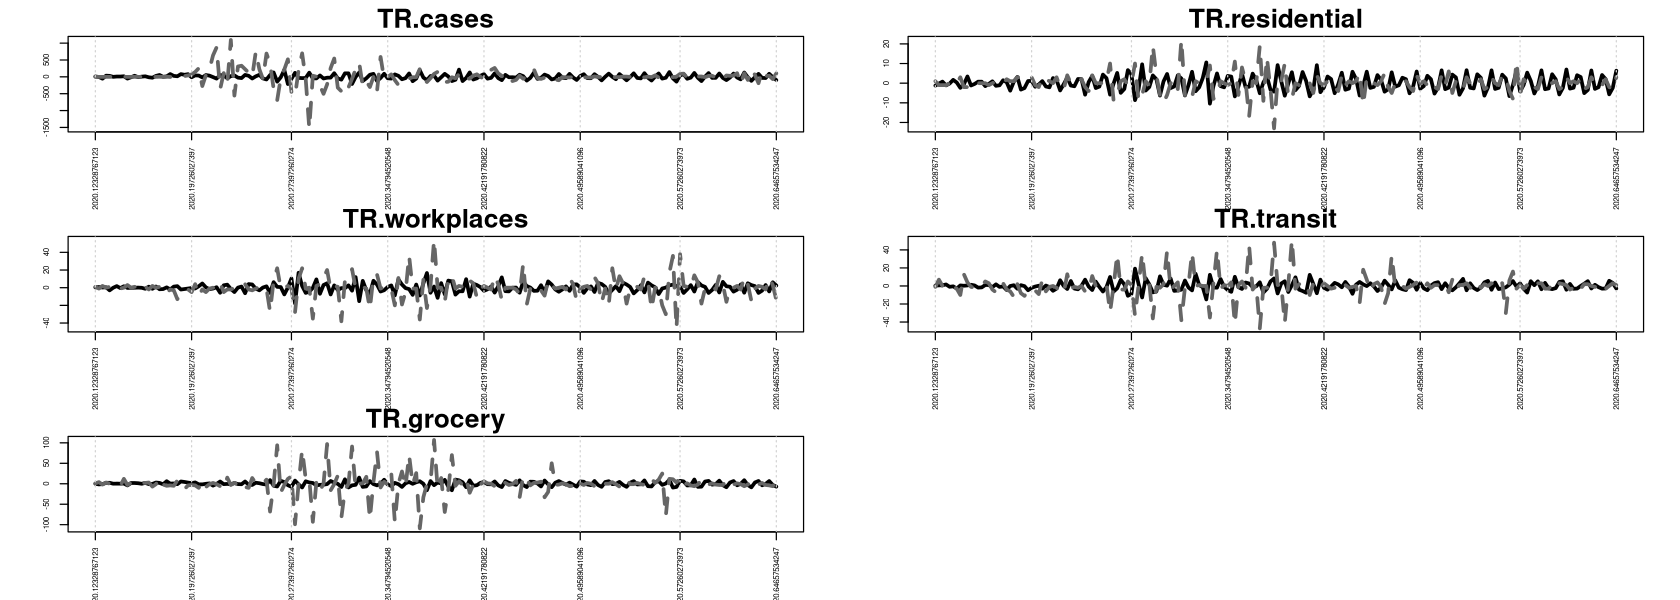

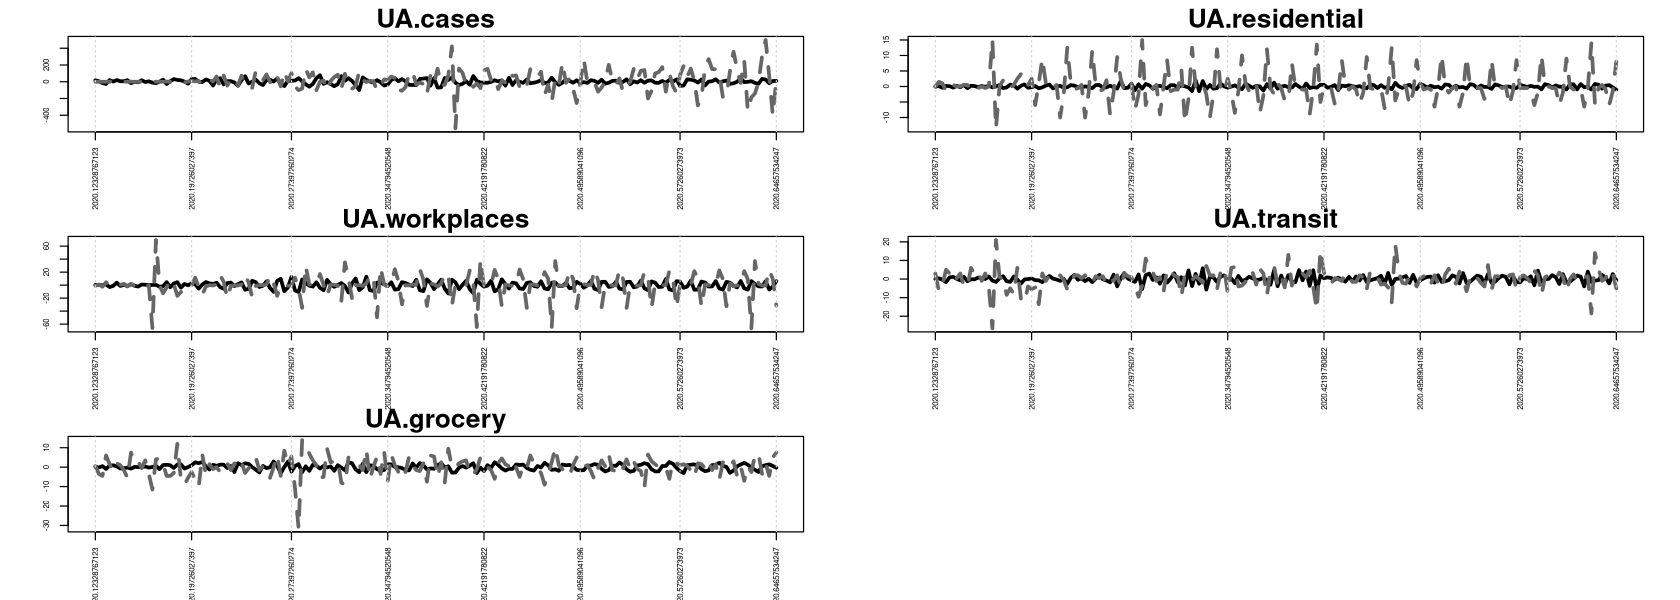

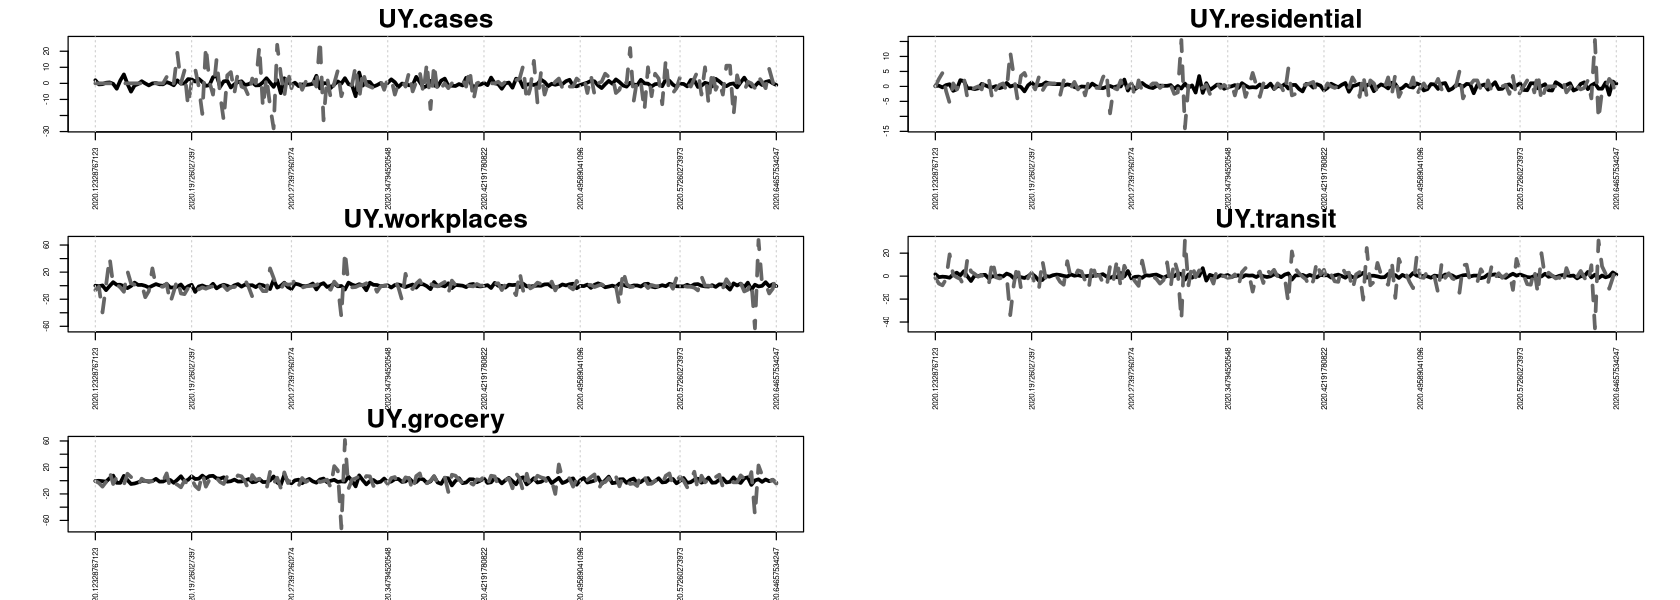

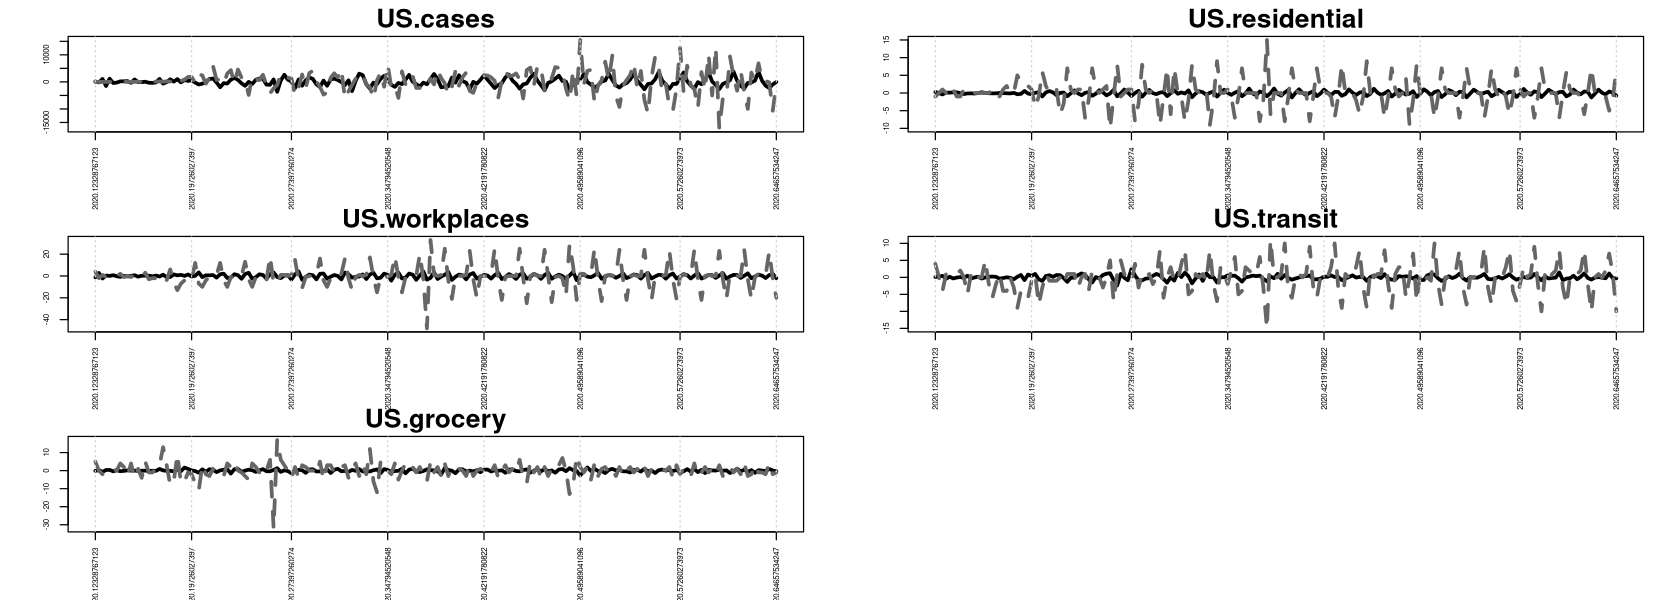

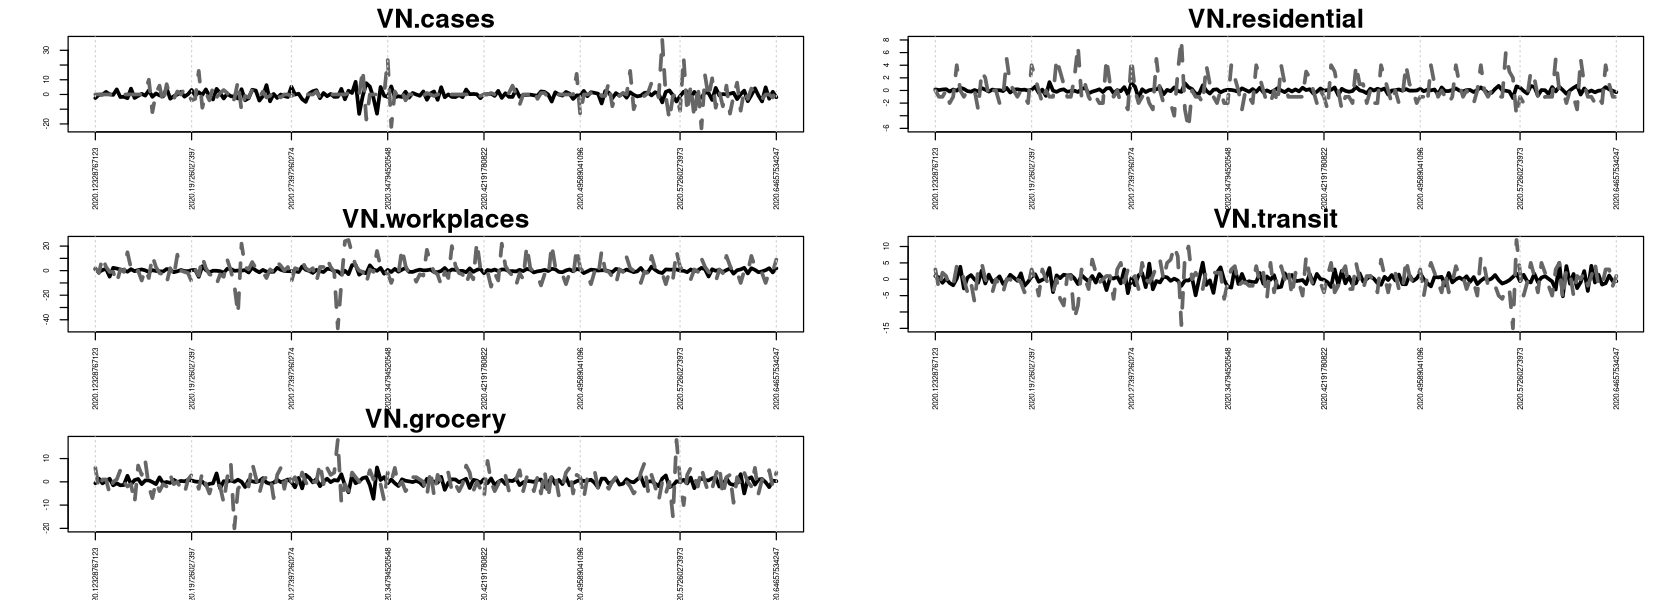

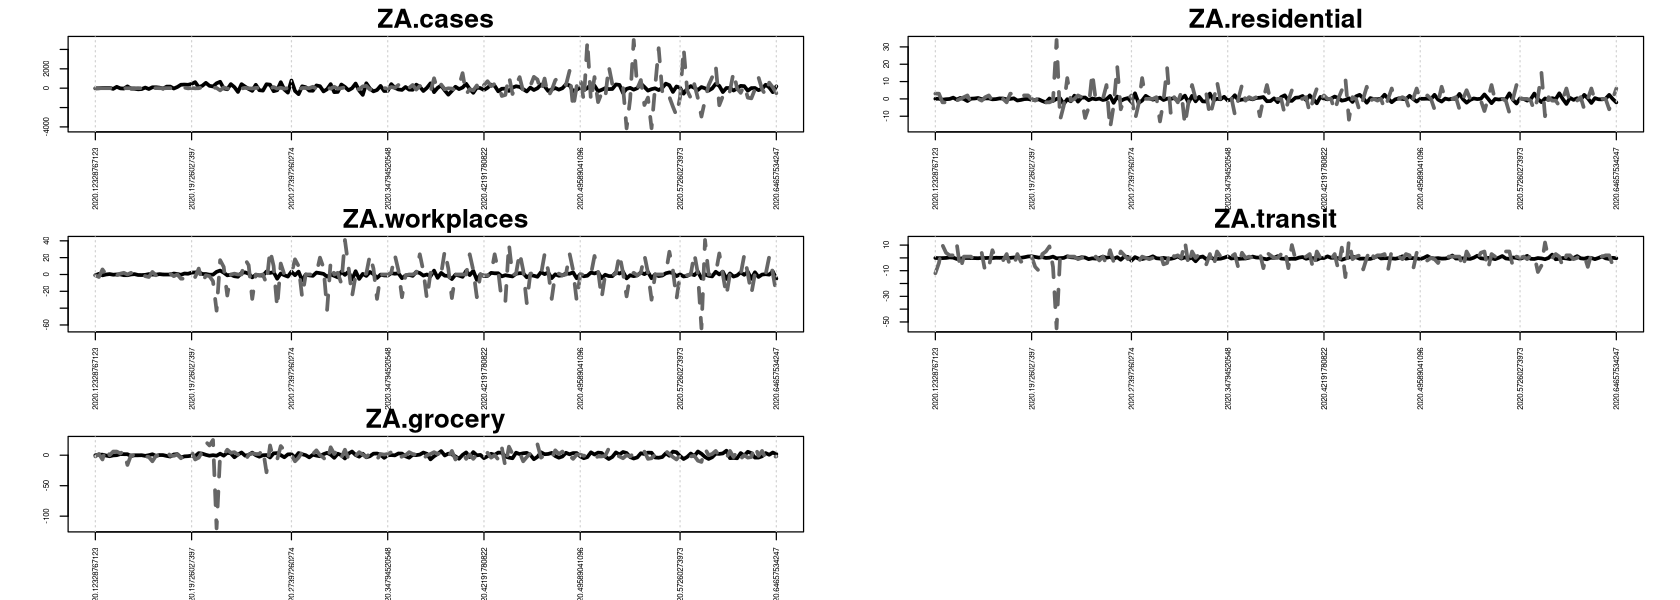

In [73]:
plot(model)